# Sesion 3: Exploracion de datos y definicion de limites

### Objetivos:

1. Revision proceso de exploracion de datos (variables categoricas y cuantitativas)

2. Revision proceso de transformacion de datos segun tipo de variables de datos

3. Definicion de limites segun datos cuantitativos

4. Definicion de limites segun segmentacion de datos

5. Modelo de clasificacion

### Recursos:



1. Informacion: Se utilizara el archivo 'payments.csv', el cual contiene informacion de transacciones de la entidad Adyen para el 2023.

    La fuente de informacion esta disponible en hugging face. Es importante mencionar que el conjunto de datos hace parte de un proyecto mas amplio el cual tiene el objetivo de implementar una agente de razonamiento. Por lo pronto, el objetivo de la presente sesion no es abordar los componentes del agente, sin embargo, se expone en caso que se desee profundizar en la fuente de datos.

    https://huggingface.co/blog/dabstep

    https://huggingface.co/datasets/adyen/DABstep/tree/main/data/context

2. Con respecto a los recurso computacionales, se utilizaran jupyter notebooks y python (con sus respectivas librerias)


### Cargue datos y librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Ajustar ruta segun usuario
data_path = '/home/bric/Documents/Credibanco/Modulo2/src/data/payments.csv' 

# Lectura de datos
df = pd.read_csv(data_path)

In [4]:
df.info() # Revision rapida de datos cargados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138236 entries, 0 to 138235
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   psp_reference           138236 non-null  int64  
 1   merchant                138236 non-null  object 
 2   card_scheme             138236 non-null  object 
 3   year                    138236 non-null  int64  
 4   hour_of_day             138236 non-null  int64  
 5   minute_of_hour          138236 non-null  int64  
 6   day_of_year             138236 non-null  int64  
 7   is_credit               138236 non-null  bool   
 8   eur_amount              138236 non-null  float64
 9   ip_country              138236 non-null  object 
 10  issuing_country         138236 non-null  object 
 11  device_type             138236 non-null  object 
 12  ip_address              110589 non-null  object 
 13  email_address           124412 non-null  object 
 14  card_number         

In [5]:
df.isna().sum() # Validar campos NA

psp_reference                 0
merchant                      0
card_scheme                   0
year                          0
hour_of_day                   0
minute_of_hour                0
day_of_year                   0
is_credit                     0
eur_amount                    0
ip_country                    0
issuing_country               0
device_type                   0
ip_address                27647
email_address             13824
card_number                   0
shopper_interaction           0
card_bin                      0
has_fraudulent_dispute        0
is_refused_by_adyen           0
aci                           0
acquirer_country              0
dtype: int64

In [6]:
print(df.columns) # visualizacion de columnas

pd.set_option('display.max_columns', None)
df.head()


Index(['psp_reference', 'merchant', 'card_scheme', 'year', 'hour_of_day',
       'minute_of_hour', 'day_of_year', 'is_credit', 'eur_amount',
       'ip_country', 'issuing_country', 'device_type', 'ip_address',
       'email_address', 'card_number', 'shopper_interaction', 'card_bin',
       'has_fraudulent_dispute', 'is_refused_by_adyen', 'aci',
       'acquirer_country'],
      dtype='object')


,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,card_bin,has_fraudulent_dispute,is_refused_by_adyen,aci,acquirer_country
0,20034594130,Crossfit_Hanna,NexPay,2023,16,21,12,False,151.74,SE,SE,Windows,pKPYzJqqwB8TdpY0jiAeQw,0AKXyaTjW7H4m1hOWmOKBQ,uRofX46FuLUrSOTz8AW5UQ,Ecommerce,4802,False,False,F,NL
1,36926127356,Crossfit_Hanna,NexPay,2023,23,58,75,False,45.70,NL,NL,Linux,uzUknOkIqExYsWv4X14GUg,_Gm8at1k2ojYAM_wSEptNw,6vqQ89zfCeFk6s4VOoWZFQ,Ecommerce,4920,False,False,F,NL
2,31114608278,Belles_cookbook_store,GlobalCard,2023,4,30,96,False,14.11,NL,NL,MacOS,3VO1v_RndDg6jzEiPjfvoQ,NaN,EmxSN8-GXQw3RG_2v7xKxQ,Ecommerce,4571,False,False,F,US
3,68442235288,Crossfit_Hanna,NexPay,2023,3,5,77,True,238.42,LU,LU,iOS,3qbuXGoFldniCC6r1X8K0Q,5VW_2O6ku_0p_fLLwuC1vw,wG2VTvj2TfVG-NRDzifMHw,Ecommerce,4017,False,False,D,NL
4,81404384199,Crossfit_Hanna,NexPay,2023,17,30,83,False,67.13,NL,NL,Windows,9WMJJdgtop6jkkyerxMvuQ,Alb1iUIxIqlW8YUeYVGTzg,0khzuCj7aQ1e51S5vWR8gg,Ecommerce,4532,False,False,F,NL


In [7]:
# Creacion de listas de columnas segun tipo de datos

categorical_cols = ['psp_reference','merchant', 'card_scheme','is_credit','ip_country', 'issuing_country', 'device_type', 'ip_address',
       'email_address', 'card_number', 'shopper_interaction', 'card_bin',
       'has_fraudulent_dispute', 'is_refused_by_adyen', 'aci',
       'acquirer_country']

numerical_cols = ['eur_amount']

date_cols = ['year', 'hour_of_day',
       'minute_of_hour', 'day_of_year']

relevant_categorical_cols = ['merchant', 'card_scheme','is_credit','ip_country', 'issuing_country', 'device_type',
       'shopper_interaction', 'card_bin',
       'has_fraudulent_dispute', 'is_refused_by_adyen', 'aci',
       'acquirer_country']

In [8]:
# Seleccion de columnas

target_columns = ['merchant', 'card_scheme','is_credit','ip_country', 'issuing_country', 'device_type',
       'shopper_interaction', 'card_bin',
       'has_fraudulent_dispute', 'is_refused_by_adyen', 'aci',
       'acquirer_country','eur_amount']

### Transformacion de variable fecha

In [9]:
# Validacion ano y dias

print(df['year'].value_counts())
sorted(df['day_of_year'].unique())

year
2023    138236
Name: count, dtype: int64


[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(61),
 np.int64(62),
 np.int64(63),
 np.int64(64),
 np.int64(65),
 np.int64(66),
 np.int64(67),
 np.

### Exploracion de variables categoricas

merchant
Crossfit_Hanna              55139
Golfclub_Baron_Friso        27748
Rafa_AI                     27696
Belles_cookbook_store       13848
Martinis_Fine_Steakhouse    13805
Name: count, dtype: int64



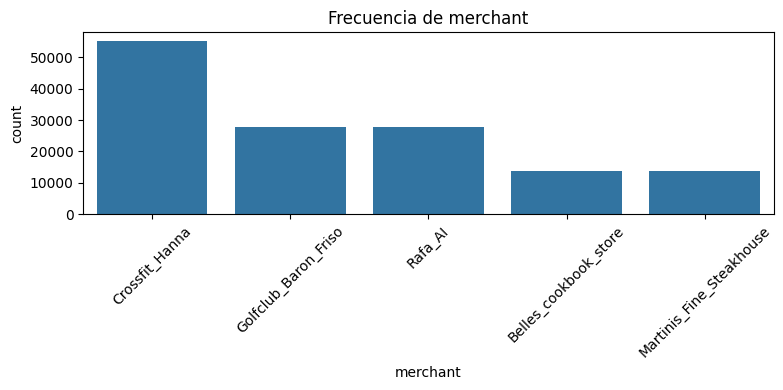

card_scheme
GlobalCard      48150
NexPay          41679
TransactPlus    34674
SwiftCharge     13733
Name: count, dtype: int64



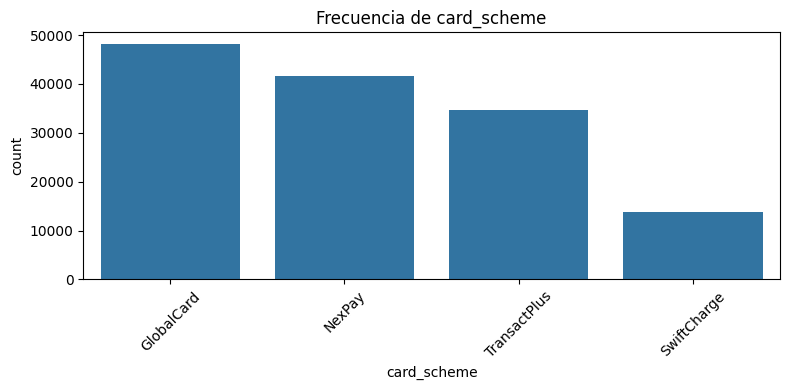

is_credit
True     101119
False     37117
Name: count, dtype: int64



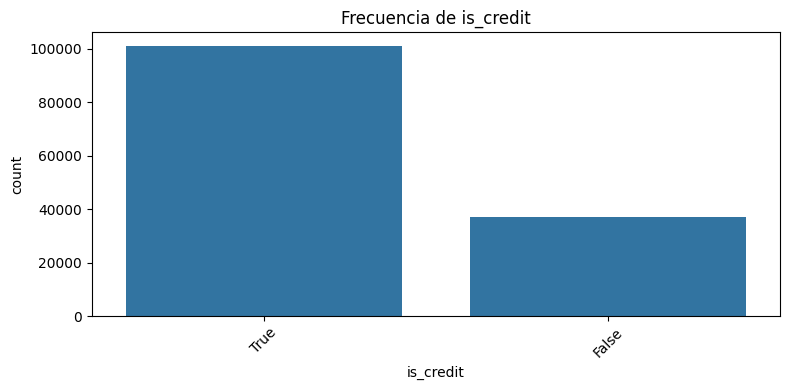

ip_country
NL    29760
IT    28246
BE    22976
SE    21664
FR    14209
LU     7151
GR     7123
ES     7107
Name: count, dtype: int64



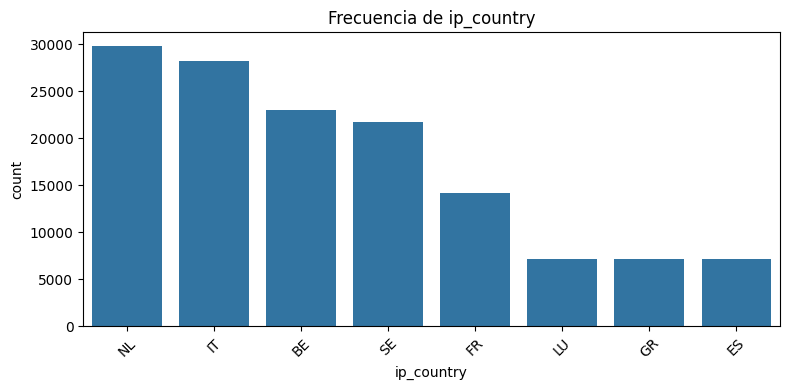

issuing_country
NL    29622
IT    28329
BE    23040
SE    21716
FR    14175
LU     7171
ES     7109
GR     7074
Name: count, dtype: int64



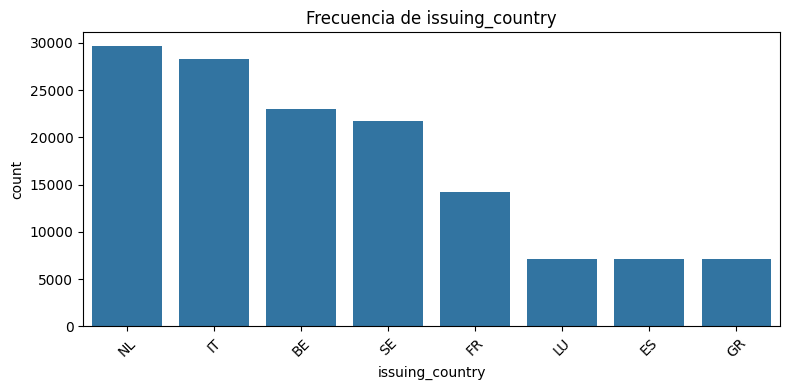

device_type
Other      31018
Android    22599
iOS        22520
MacOS      20781
Windows    20734
Linux      20584
Name: count, dtype: int64



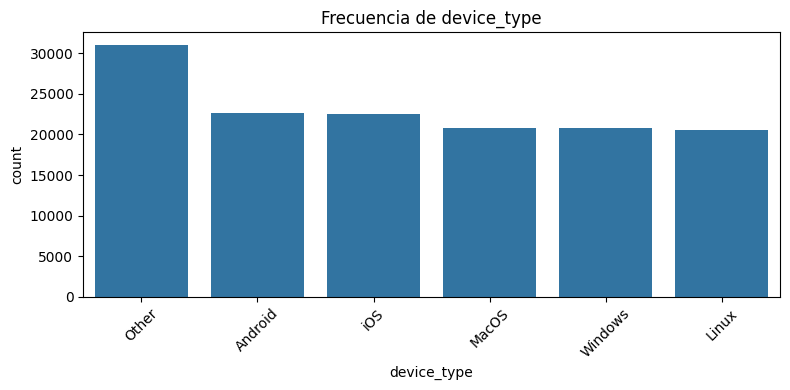

shopper_interaction
Ecommerce    125839
POS           12397
Name: count, dtype: int64



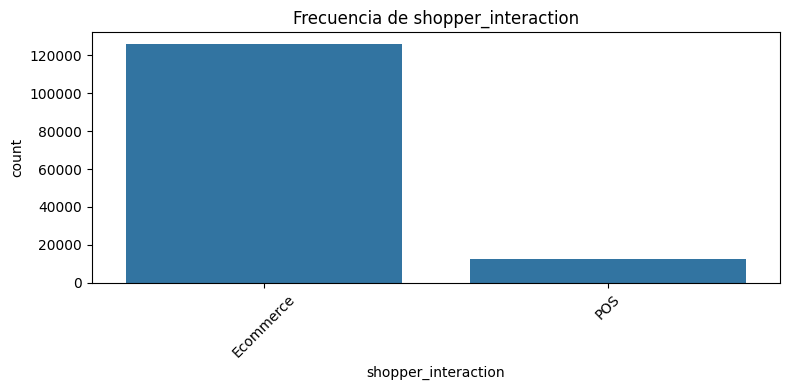

card_bin
4556    29179
4916    21624
4571    14580
4920     7365
4526     7353
4645     7351
4891     7330
4802     7324
4133     7257
4532     7241
4622     7230
4017     7221
4236     7181
Name: count, dtype: int64



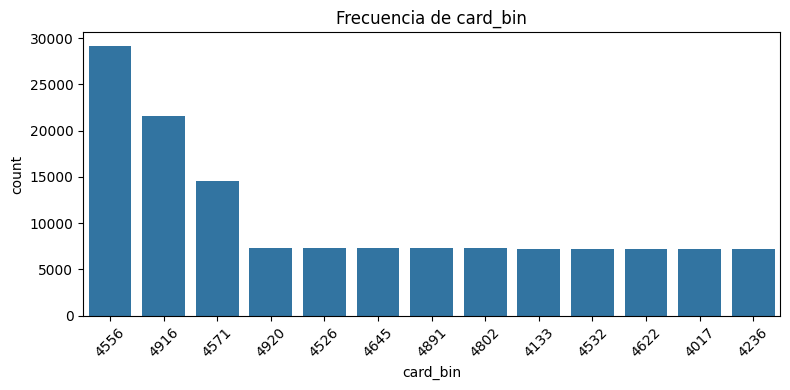

has_fraudulent_dispute
False    127471
True      10765
Name: count, dtype: int64



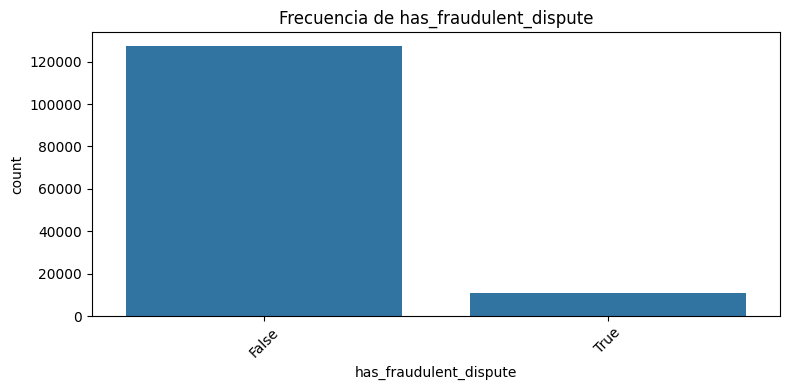

is_refused_by_adyen
False    129411
True       8825
Name: count, dtype: int64



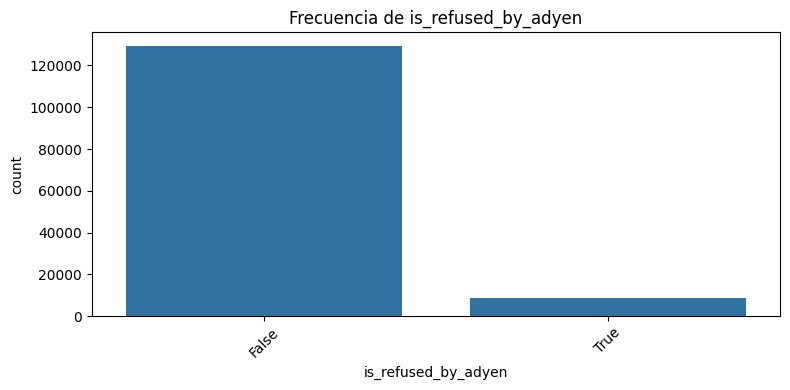

aci
D    49642
F    29266
G    25463
E    21468
C     5807
A     3837
B     2753
Name: count, dtype: int64



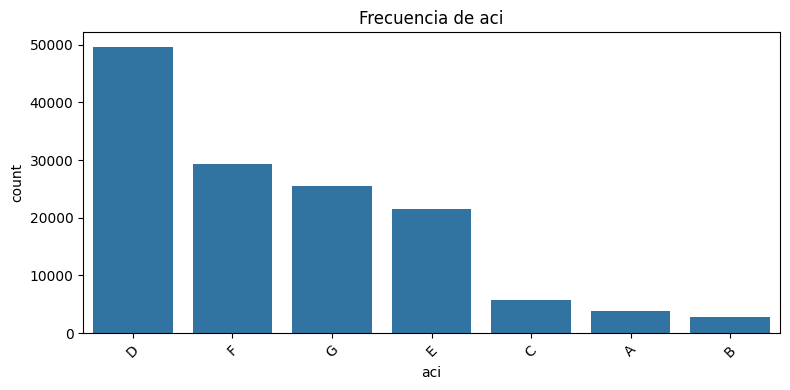

acquirer_country
NL    80025
IT    27748
US    13848
FR    13805
GB     2810
Name: count, dtype: int64



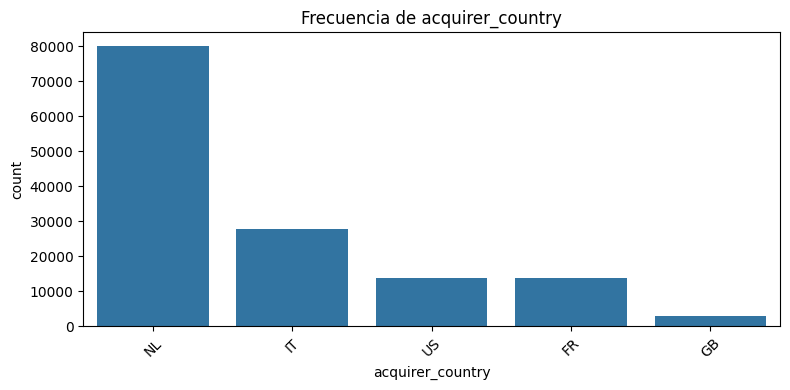

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df[relevant_categorical_cols].columns:
    print(f'{df[col].value_counts()}\n')
    
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Seleccion Variables Categoricas


Número total de características después de la transformación: 62

Las 10 características seleccionadas:
- is_credit_False
- has_fraudulent_dispute_False
- has_fraudulent_dispute_True
- aci_A
- aci_B
- aci_C
- aci_D
- aci_E
- aci_F
- aci_G

Top 15 características más importantes (ordenadas por puntuación):
                         Feature         Score        P-value
56                         aci_G  28325.295760   0.000000e+00
53                         aci_D   3385.265936   0.000000e+00
55                         aci_F   1995.753452   0.000000e+00
54                         aci_E   1463.979878   0.000000e+00
49   has_fraudulent_dispute_True    734.103940  1.147695e-161
50                         aci_A    660.032755  1.469637e-145
52                         aci_C    396.000147   4.089434e-88
51                         aci_B    187.736939   9.915705e-43
9                is_credit_False    146.235156   1.153275e-33
48  has_fraudulent_dispute_False     61.995504   3.442423e-15
10        

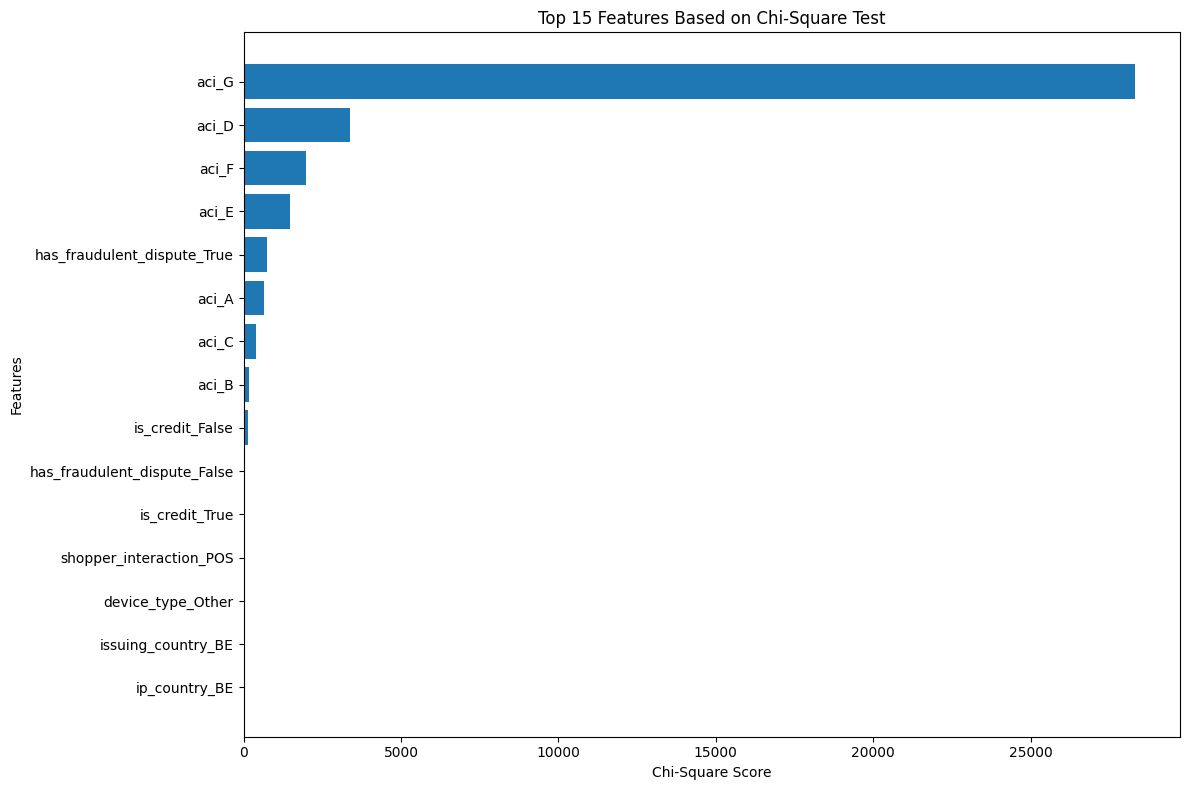

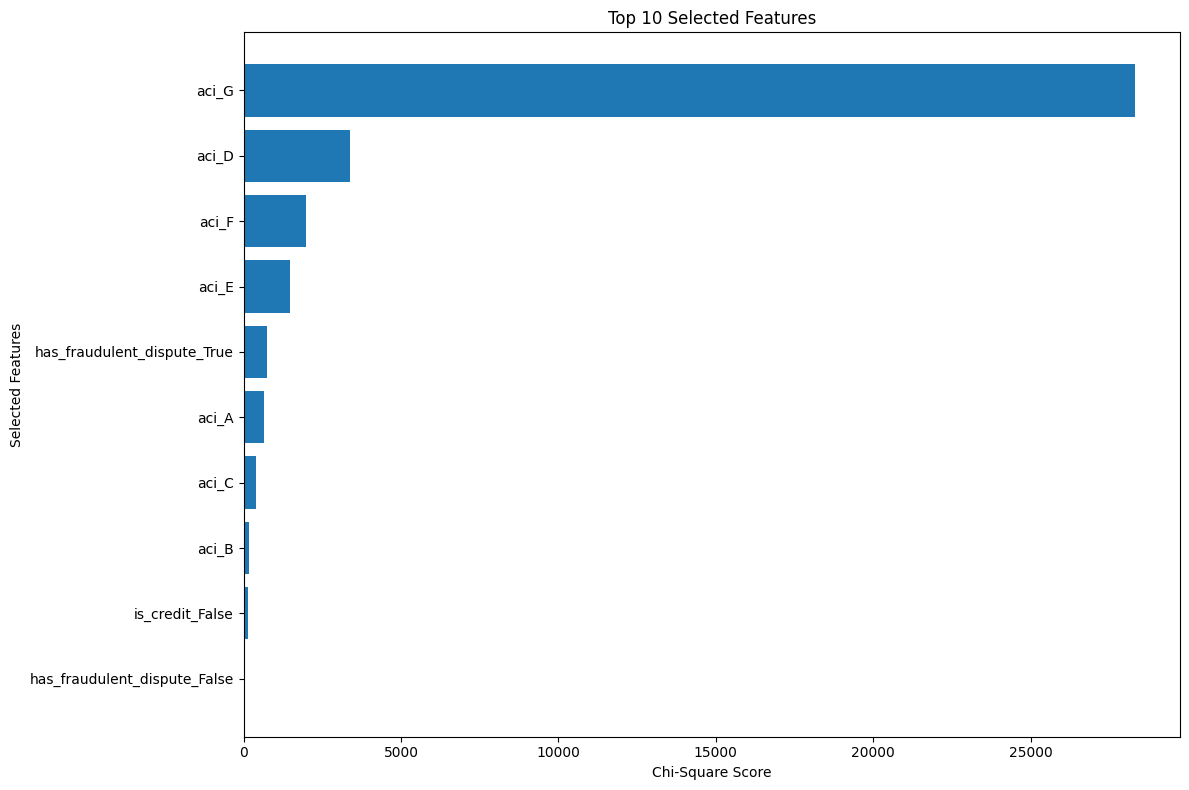

In [11]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar las características (X) de la variable objetivo (y)
X_cat = df.drop('is_refused_by_adyen', axis=1)
y = df['is_refused_by_adyen']

categorical_features = [col for col in relevant_categorical_cols if col != 'is_refused_by_adyen']

# Crear un transformador para las variables categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Crear un preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Obtener los datos transformados sin aplicar selección para tener todos los nombres de columnas
X_transformed = preprocessor.fit_transform(X_cat)
ohe = preprocessor.named_transformers_['cat']
all_feature_names = ohe.get_feature_names_out(categorical_features)

# Crear un DataFrame con las variables transformadas para mejor visualización
X_transformed_df = pd.DataFrame(
    X_transformed, 
    columns=all_feature_names
)

#print("Primeras 5 filas de los datos transformados:")
#print(X_transformed_df.head())
print(f"\nNúmero total de características después de la transformación: {X_transformed_df.shape[1]}")

# Preparar el pipeline con el preprocesador y SelectKBest
# Usaremos chi2 ya que es adecuado para características positivas (como las generadas por OneHotEncoder)
k = 10  # Número de características a seleccionar
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(chi2, k=k))  # Seleccionar las k mejores características
])

# Ajustar el pipeline a los datos
X_selected = pipeline.fit_transform(X_cat, y)

# Obtener los índices de las características seleccionadas
selected_indices = pipeline.named_steps['selector'].get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_features = [all_feature_names[i] for i in selected_indices]

# Mostrar las características seleccionadas
print(f"\nLas {k} características seleccionadas:")
for feature in selected_features:
    print(f"- {feature}")

# Obtener las puntuaciones de todas las características
scores = pipeline.named_steps['selector'].scores_
pvalues = pipeline.named_steps['selector'].pvalues_

# Crear un DataFrame con características, puntuaciones y valores p para mejor visualización
feature_scores = pd.DataFrame({
    'Feature': all_feature_names,
    'Score': scores,
    'P-value': pvalues
})

# Ordenar por puntuación en orden descendente
feature_scores = feature_scores.sort_values('Score', ascending=False)

print("\nTop 15 características más importantes (ordenadas por puntuación):")
print(feature_scores.head(15))

# Guardar las características seleccionadas en un DataFrame separado
selected_features_df = feature_scores[feature_scores['Feature'].isin(selected_features)]
print("\nResumen de las características seleccionadas:")
print(selected_features_df)

# Visualizar las top N características con sus puntuaciones
top_n = 15
plt.figure(figsize=(12, 8))
plt.barh(feature_scores['Feature'][:top_n][::-1], feature_scores['Score'][:top_n][::-1])
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.title(f'Top {top_n} Features Based on Chi-Square Test')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Visualizar solo las características seleccionadas
plt.figure(figsize=(12, 8))
plt.barh(selected_features_df['Feature'][::-1], selected_features_df['Score'][::-1])
plt.xlabel('Chi-Square Score')
plt.ylabel('Selected Features')
plt.title(f'Top {k} Selected Features')
plt.tight_layout()
plt.savefig('selected_features.png')
plt.show()

# Crear un DataFrame con los datos transformados seleccionados
X_selected_df = pd.DataFrame(
    X_selected, 
    columns=selected_features
)

#print("\nPrimeras 5 filas de los datos transformados seleccionados:")
#print(X_selected_df.head())

# Función para decodificar las características one-hot seleccionadas
def interpret_selected_features(selected_features):
    """
    Interpreta las características seleccionadas y las agrupa por variable original.
    """
    feature_importance_by_original = {}
    
    for feature in selected_features:
        # Separar el nombre de la característica original y el valor
        parts = feature.split('_')
        original_feature = parts[0]
        if original_feature not in feature_importance_by_original:
            feature_importance_by_original[original_feature] = []
        
        feature_importance_by_original[original_feature].append(feature)
    
    return feature_importance_by_original

# # Agrupar características seleccionadas por variable original
# feature_groups = interpret_selected_features(selected_features)
# print("\nVariables originales más relevantes y sus valores específicos seleccionados:")
# for original_feature, selected_values in feature_groups.items():
#     print(f"\n{original_feature}:")
#     for value in selected_values:
#         # Encontrar la puntuación para esta característica
#         score = feature_scores[feature_scores['Feature'] == value]['Score'].values[0]
#         print(f"  - {value}: {score}")


In [12]:
X_selected_df

,is_credit_False,has_fraudulent_dispute_False,has_fraudulent_dispute_True,aci_A,aci_B,aci_C,aci_D,aci_E,aci_F,aci_G
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
138231,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
138232,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
138233,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
138234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Exploracion de variables continuas

In [13]:
df[numerical_cols].describe()

,eur_amount
count,138236.000000
mean,91.852321
std,121.730514
min,0.500000
25%,28.370000
50%,55.740000
75%,109.282500
max,4811.760000


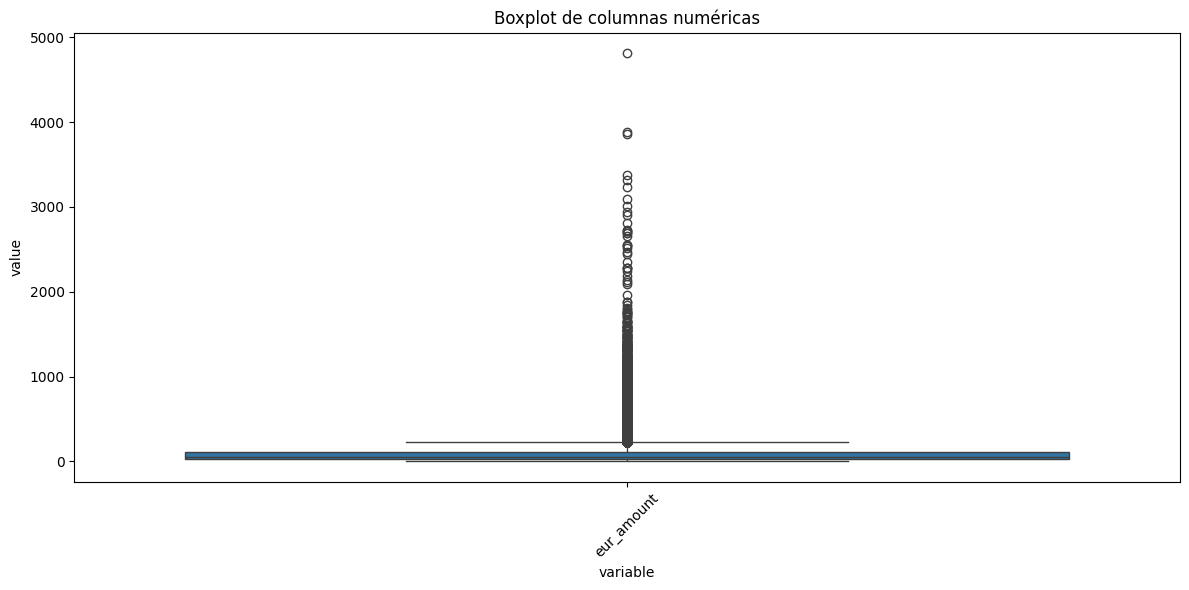

In [14]:
df_long = pd.melt(df[numerical_cols])

plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_long)
plt.xticks(rotation=45)
plt.title("Boxplot de columnas numéricas")
plt.tight_layout()
plt.show()

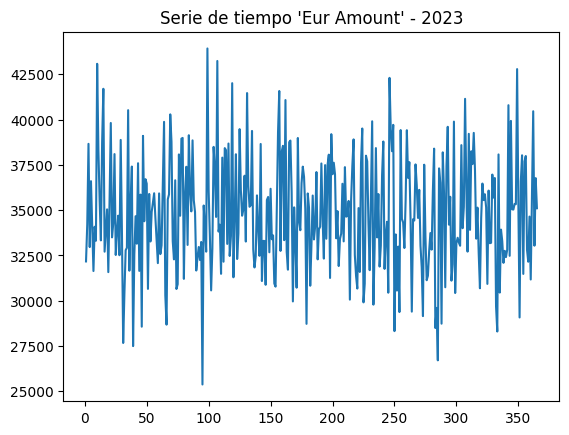

In [15]:
amount_by_date = df.groupby('day_of_year')['eur_amount'].sum().reset_index()
plt.plot(amount_by_date['day_of_year'],amount_by_date['eur_amount'])
plt.title("Serie de tiempo 'Eur Amount' - 2023")
plt.show()

### Transformacion variables cuantitativas

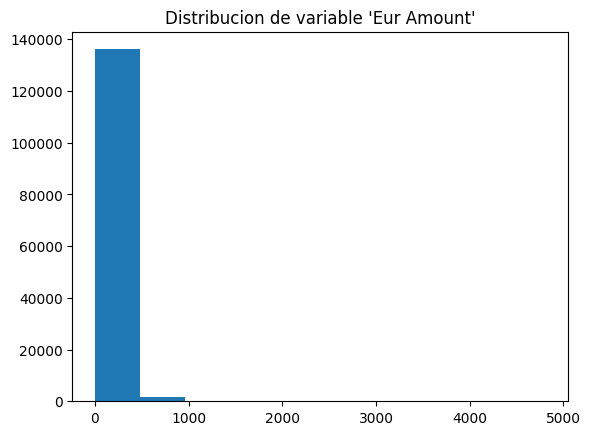

In [16]:
plt.hist(df[numerical_cols])
plt.title("Distribucion de variable 'Eur Amount'")
plt.show()

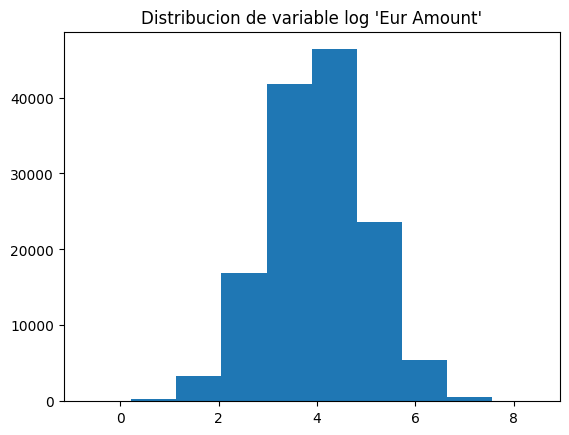

In [17]:
plt.hist(np.log(df[numerical_cols]))
plt.title("Distribucion de variable log 'Eur Amount'")
plt.show()

In [18]:
log_transformed_numerical_col = np.log(df[numerical_cols])

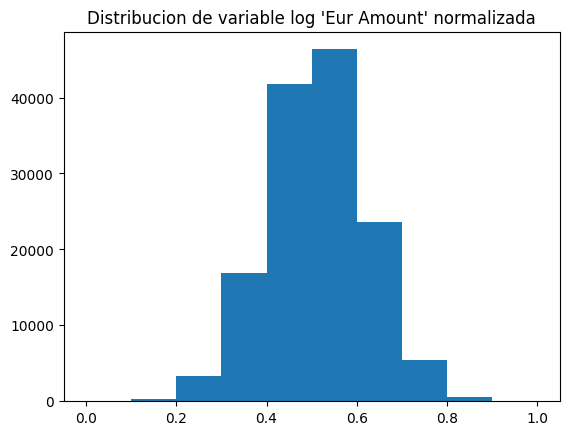

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
transformed_numerical_col = scaler.fit_transform(log_transformed_numerical_col)
plt.title("Distribucion de variable log 'Eur Amount' normalizada")
plt.hist(transformed_numerical_col)
plt.show()

df_transformed_numerical_col = pd.DataFrame(transformed_numerical_col, columns=['transformed_eurc_amount'])

### Definicion dataframe para modelo

In [20]:
# Tabla de datos con variables regresoras

print(pd.concat([X_selected_df,df_transformed_numerical_col],axis=1).isna().sum())
X_segm = pd.concat([X_selected_df,df_transformed_numerical_col],axis=1)
y_segm = y

is_credit_False                 0
has_fraudulent_dispute_False    0
has_fraudulent_dispute_True     0
aci_A                           0
aci_B                           0
aci_C                           0
aci_D                           0
aci_E                           0
aci_F                           0
aci_G                           0
transformed_eurc_amount         0
dtype: int64


### Descomposicion series de tiempo

1. Tendencia

¿Qué es?

Es el movimiento a largo plazo de la serie, ya sea ascendente, descendente o estable.

¿Por qué es importante?

Ayuda a identificar cambios estructurales en el tiempo (por ejemplo, crecimiento económico, envejecimiento poblacional, inflación).

Permite ajustar modelos para capturar la dirección general del fenómeno.

El conocimiento de la tendencia evita errores al asumir estabilidad donde hay evolución.

2. Estacionalidad

¿Qué es?

Son patrones que se repiten regularmente en el tiempo (diarios, semanales, mensuales, anuales, etc.).

¿Por qué es importante?

Permite identificar ciclos naturales en los datos (por ejemplo, ventas navideñas, consumo eléctrico en verano).

Mejora la precisión del pronóstico al incorporar esos ciclos.

Es clave para decisiones operativas: stock, personal, campañas, etc.

3. Residuos o Irregularidad

¿Qué es?

Son las variaciones no explicadas por la tendencia ni la estacionalidad. Contienen ruido, eventos aleatorios o anomalías.

¿Por qué es importante?

Ayuda a detectar eventos atípicos (como crisis, pandemias, errores de registro).

Un residuo bien comportado (como ruido blanco) indica que el modelo capta adecuadamente la estructura de la serie.

Permite evaluar la calidad del ajuste y la necesidad de modelos más complejos.


¿Cuál elegir?

Comportamiento de la serie	Modelo adecuado

Estacionalidad constante a lo largo del tiempo (ej. variaciones similares en euros en enero o diciembre) 

->	Aditivo

Estacionalidad proporcional al nivel de la serie (más alta cuando la serie es alta, más baja cuando la serie es baja) 

-> Multiplicativo

Ejemplo:
Si tienes una serie de ingresos y los picos estacionales crecen junto con la tendencia, usa multiplicativo.

Si los picos son más o menos iguales en tamaño, usa aditivo.

'period' define el ciclo completo de estacionalidad. 

Por ejemplo:

Frecuencia de datos	Ejemplo de period	Significado

Diario	period=7	Ciclo semanal

Diario	period=365	Ciclo anual

Mensual	period=12	Ciclo anual

Horario	period=24	Ciclo diario

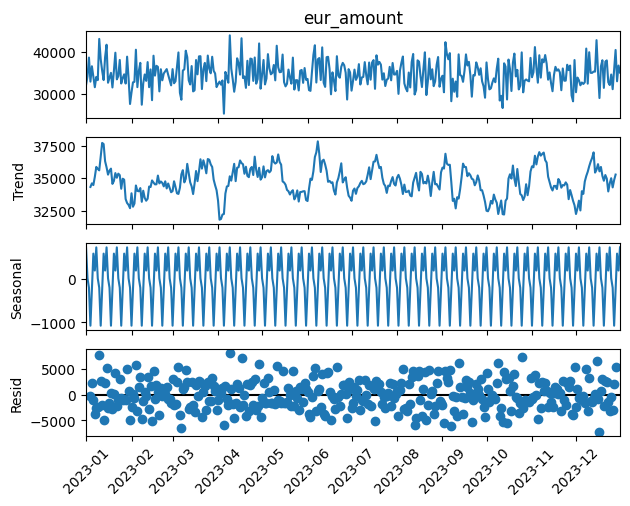

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Asegúrate de que tu serie esté indexada por fecha
amount_by_date['date'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(amount_by_date['day_of_year'] - 1, unit='D')
amount_by_date.set_index('date', inplace=True)

# Descomponer la serie (ejemplo con 'eur_amount')
result = seasonal_decompose(amount_by_date['eur_amount'], model='additive', period=7)  # ajusta period si necesario

# Visualizar
result.plot()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

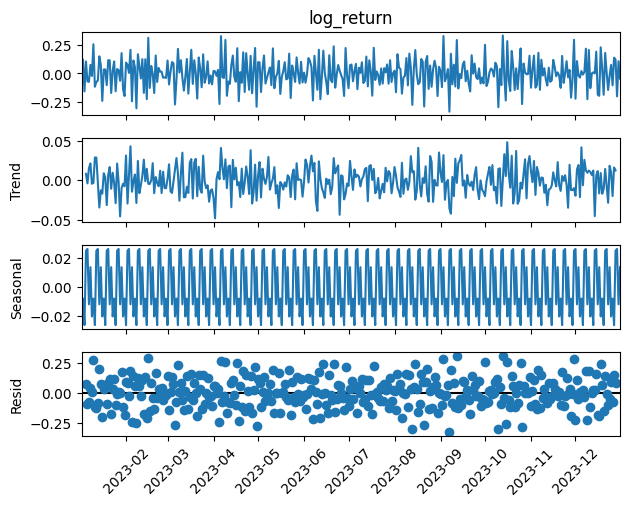

In [70]:
amount_by_date['log_return'] = np.log(amount_by_date['eur_amount'] / amount_by_date['eur_amount'].shift(1))

# Descomponer la serie (ejemplo con 'eur_amount')
result_log = seasonal_decompose(amount_by_date['log_return'].dropna(), model='additive', period=7)  # ajusta period si necesario

# Visualizar
result_log.plot()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Definicion limites series de tiempo

#### Perspectiva estadistica

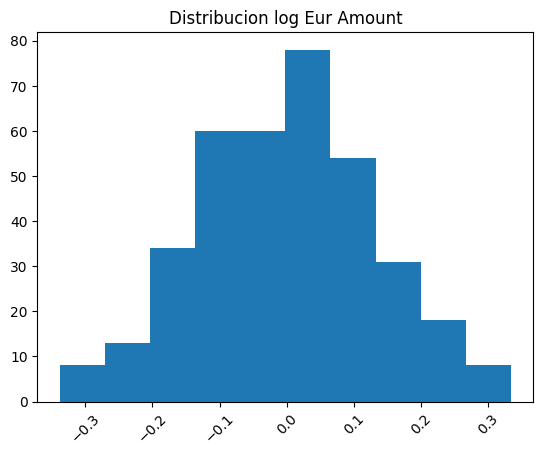

In [71]:
plt.hist(amount_by_date['log_return'])
plt.title('Distribucion log Eur Amount')
plt.xticks(rotation=45)
plt.show()

In [16]:
from scipy.stats import shapiro

stat, p = shapiro(amount_by_date['log_return'].dropna())
print(f'Statistic={stat:.4f}, p-value={p:.4e}')

if p > 0.05:
    print("No se rechaza H₀: la distribución parece normal.")
else:
    print("Se rechaza H₀: la distribución no parece normal.")


Statistic=0.9968, p-value=6.8328e-01
No se rechaza H₀: la distribución parece normal.


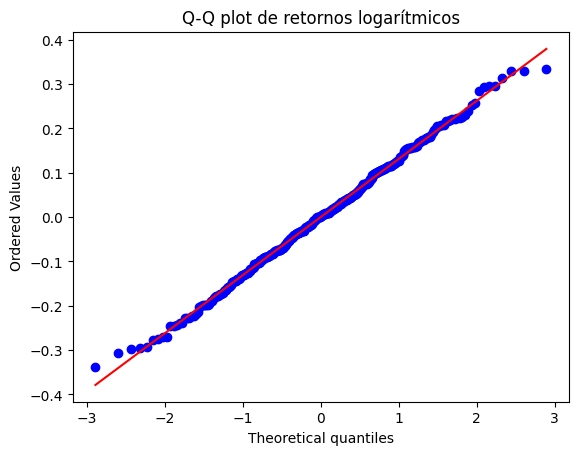

In [17]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(amount_by_date['log_return'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q plot de retornos logarítmicos")
plt.show()


#### Indice Intercuartilico

In [76]:
def calcular_iqr_outliers(serie):
    """
    Calcula Q1, Q3, IQR y detecta outliers usando la regla 1.5 * IQR.

    Parámetros:
    serie (pd.Series): Serie numérica (por ejemplo, log_return)

    Retorna:
    dict: Contiene Q1, Q3, IQR, límites inferior/superior y los outliers
    """
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = serie[(serie < lower_bound) | (serie > upper_bound)]

    return {
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers
    }

In [77]:
iqr_resultado = calcular_iqr_outliers(amount_by_date['log_return'])
print(iqr_resultado)


{'Q1': np.float64(-0.08858859077154523), 'Q3': np.float64(0.09527868794389131), 'IQR': np.float64(0.18386727871543654), 'Lower Bound': np.float64(-0.36438950884470006), 'Upper Bound': np.float64(0.37107960601704615), 'Outliers': Series([], Name: log_return, dtype: float64)}


In [78]:
import numpy as np

amount_by_date['original_return'] = np.exp(amount_by_date['log_return']) - 1

iqr_resultado = calcular_iqr_outliers(amount_by_date['original_return'])
print(iqr_resultado)


{'Q1': np.float64(-0.08477795859608103), 'Q3': np.float64(0.09996634624583717), 'IQR': np.float64(0.1847443048419182), 'Lower Bound': np.float64(-0.3618944158589583), 'Upper Bound': np.float64(0.3770828035087145), 'Outliers': date
2023-04-06    0.389259
2023-09-03    0.389521
2023-10-13    0.396696
Name: original_return, dtype: float64}


#### Simulacion escenarios deterministicos

Media: 0.00024, Volatilidad (desvío estándar): 0.13039


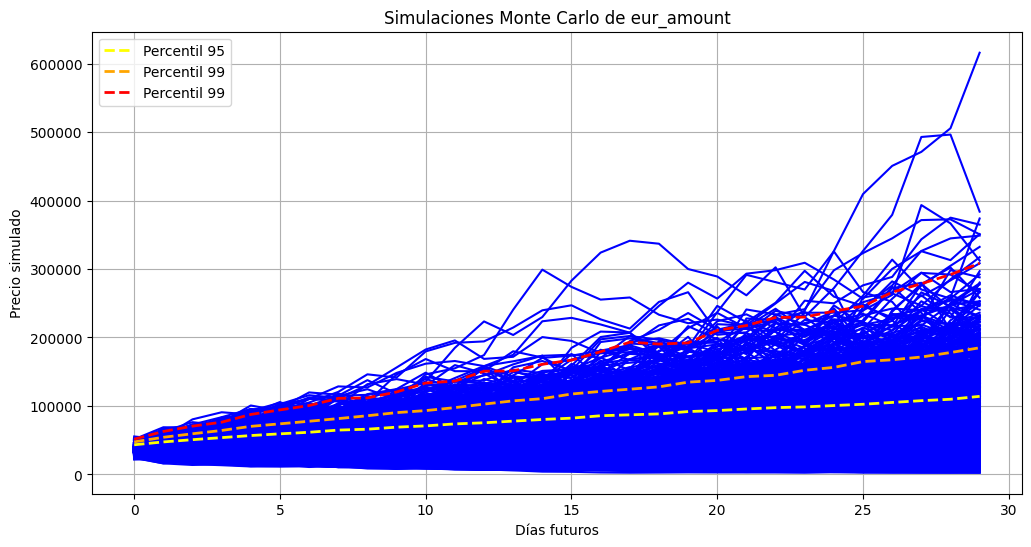

In [18]:
returns = amount_by_date['log_return'].dropna()
mu = returns.mean()
sigma = returns.std()

print(f"Media: {mu:.5f}, Volatilidad (desvío estándar): {sigma:.5f}")

# Parámetros de simulación
num_days = 30  # días hábiles en un año
num_simulations = 10000
last_price = amount_by_date['eur_amount'].iloc[-1]

# Simulación Monte Carlo
simulated_prices = np.zeros((num_days, num_simulations))

for i in range(num_simulations):
    random_returns = np.random.normal(loc=mu, scale=sigma, size=num_days)
    price_series = last_price * np.exp(np.cumsum(random_returns))  # log-retorno acumulado
    simulated_prices[:, i] = price_series

# Calcular el percentil 95 por fila (por día futuro)
percentile_95_series = np.percentile(simulated_prices, 95, axis=1)
percentile_99_series = np.percentile(simulated_prices, 99, axis=1)
percentile_99_9_series = np.percentile(simulated_prices, 99.9, axis=1)
    
plt.figure(figsize=(12, 6))
plt.plot(simulated_prices, color='blue')
plt.plot(percentile_95_series, color='yellow', linewidth=2, linestyle='--', label='Percentil 95')
plt.plot(percentile_99_series, color='orange', linewidth=2, linestyle='--', label='Percentil 99')
plt.plot(percentile_99_9_series, color='red', linewidth=2, linestyle='--', label='Percentil 99.9')
plt.title('Simulaciones Monte Carlo de eur_amount')
plt.xlabel('Días futuros')
plt.ylabel('Precio simulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


#### Modelos Series de Tiempo

In [19]:
from statsmodels.tsa.stattools import adfuller

# p < 0.05 → Estacionaria ✅
# p ≥ 0.05 → No estacionaria ❌ → Aplicar diferenciación

result = adfuller(amount_by_date['log_return'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -9.05712533121403
p-value: 4.668850119726094e-15


Determinación de p y q
Los parámetros p y q representan el orden de los componentes autoregresivos (AR) y de media móvil (MA), respectivamente, en un modelo ARMA o ARIMA.

2.1 Determinación de p (Autoregresivo)
Para determinar p, se utiliza la ACF (Autocorrelation Function), que mide la relación entre una observación y sus valores pasados. Un gráfico de ACF te dará indicios de cuántos rezagos pasados son relevantes.

Si la ACF corta abruptamente después de un cierto número de rezagos, eso sugiere que p es ese número.

Si la PACF decayó gradualmente, eso también podría indicar un componente AR significativo.

2.2 Determinación de q (Media Móvil)
El parámetro q se determina mediante la PACF (Partial Autocorrelation Function), que mide la correlación entre una observación y sus rezagos, eliminando el efecto de los términos intermedios.

Si la PACF corta abruptamente, sugiere que q es igual al número de rezagos donde se produce el corte.

Si la ACF decayó gradualmente, el valor de q puede ser pequeño.

Consideraciones adicionales
Una combinación común es p=1, q=1, especialmente cuando tanto la ACF como la PACF muestran un corte claro y sencillo.

Si la serie temporal muestra un comportamiento más complejo, es recomendable probar diferentes combinaciones de p y q, y utilizar criterios de información como el AIC (Akaike Information Criterion) para seleccionar el mejor modelo.

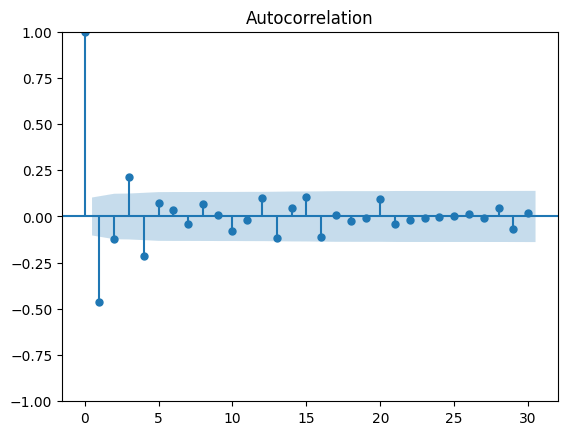

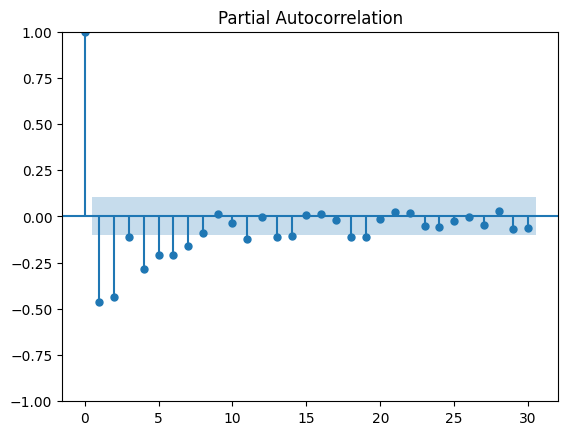

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(amount_by_date['log_return'].dropna(), lags=30)
plot_pacf(amount_by_date['log_return'].dropna(), lags=30)
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA con p=1, d=1, q=1
model = ARIMA(amount_by_date['log_return'], order=(1, 1, 1))
fitted_model = model.fit()

# Ver el resumen del modelo
print(fitted_model.summary())

/home/bric/Documents/Credibanco/Modulo2/src/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/bric/Documents/Credibanco/Modulo2/src/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/bric/Documents/Credibanco/Modulo2/src/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 257.503
Date:                Sun, 04 May 2025   AIC                           -509.007
Time:                        18:54:30   BIC                           -497.315
Sample:                    01-01-2023   HQIC                          -504.360
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4630      0.055     -8.452      0.000      -0.570      -0.356
ma.L1         -1.0000     17.728     -0.056      0.955     -35.747      33.747
sigma2         0.0133      0.236      0.056      0.9

Parámetros estimados
Parámetro	Valor	Error estándar	p-valor	Interpretación
ar.L1	-0.4630	0.055	0.000	Significativo y negativo: indica reversión a la media. Un aumento hoy tiende a revertirse.
ma.L1	-1.0000	17.728	0.955	No significativo: el componente MA es irrelevante (alta incertidumbre).
sigma2	0.0133	0.236	0.955	Varianza del error: no se estima con precisión (no significativo).

Indicadores de bondad de ajuste
Log-Likelihood: 257.503 → cuanto más alto, mejor (sirve para comparar modelos).

AIC: -509.007

BIC: -497.315

HQIC: -504.360

AIC y BIC sirven para comparar modelos: valores más bajos indican mejor ajuste penalizando la complejidad. Si otro modelo (como ARIMA(1,1,0)) tiene menor AIC/BIC, puede ser mejor opción.

Pruebas estadísticas sobre residuos
Ljung-Box (Q): 14.92 con p < 0.01

Indica autocorrelación significativa en los residuos: idealmente, esto debería no ser significativo si el modelo capta toda la estructura temporal.

Conclusión: los residuos no son ruido blanco → el modelo no captura toda la dinámica.

Jarque-Bera (JB): 1.21, p = 0.55

La normalidad de residuos no se rechaza → bien.

Heterocedasticidad (H): 0.97, p = 0.86

No hay evidencia de heterocedasticidad → residuos tienen varianza constante.

El componente AR(1) es significativo y aporta al modelo.

El componente MA(1) no es significativo y debería considerarse removerlo.

El modelo presenta autocorrelación en los residuos, lo que indica que no modela completamente la dinámica temporal.

La distribución de residuos parece adecuada en cuanto a normalidad y homocedasticidad.

In [26]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(amount_by_date['log_return'], order=(1, 1, 0))
fitted_model = model.fit()
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                  365
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 108.282
Date:                Sun, 04 May 2025   AIC                           -212.563
Time:                        21:02:31   BIC                           -204.769
Sample:                    01-01-2023   HQIC                          -209.465
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6158      0.045    -13.598      0.000      -0.705      -0.527
sigma2         0.0308      0.003     12.283      0.000       0.026       0.036
Ljung-Box (L1) (Q):                  52.04   Jarque-

/home/bric/Documents/Credibanco/Modulo2/src/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/bric/Documents/Credibanco/Modulo2/src/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/bric/Documents/Credibanco/Modulo2/src/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Resumen del modelo
Modelo: ARIMA(1,1,0)

Observaciones: 365 (es decir, toda la serie anual de 2023)

Función objetivo (Log Likelihood): 108.282

Criterios de selección:

AIC = -212.563 (mejor que el modelo anterior con ARIMA(1,1,1), que tenía AIC ≈ -509, pero ojo: el AIC anterior era positivo por un error de interpretación, pues más negativo = mejor)

BIC = -204.769

HQIC = -209.465

Parámetros del modelo
Parámetro	Coef.	p-valor	Interpretación
AR(1) (ar.L1)	-0.6158	0.000	Altamente significativo. Indica memoria negativa: un retorno alto tiende a seguirse por uno bajo.
sigma² (varianza del error)	0.0308	0.000	Significativo. Describe la dispersión de los errores.

➡️ El parámetro AR(1) es estadísticamente significativo, lo que valida el uso de este modelo simplificado.

Pruebas estadísticas en residuos
Ljung-Box (Q):

Q = 52.04, p-valor = 0.00

Esto sugiere autocorrelación residual en los residuos. Idealmente, el p-valor debería ser > 0.05.

Implica que aún hay estructura no explicada → considera mejorar el modelo.

Jarque-Bera (JB):

JB = 1.71, p-valor = 0.43

✅ No hay evidencia para rechazar la normalidad de los residuos.

Heterocedasticidad (H):

H = 0.98, p = 0.90

✅ No hay evidencia de heterocedasticidad → la varianza de los errores es constante.

Conclusión
Ventajas del modelo ARIMA(1,1,0):

Más simple y parsimonioso que ARIMA(1,1,1)

El único parámetro AR es significativo

Los residuos parecen normales y homocedásticos

Limitaciones:

La prueba Ljung-Box indica que hay autocorrelación en los residuos

Esto sugiere que el modelo no captura toda la dinámica de la serie.

Podrías intentar:

ARIMA(2,1,0)

ARIMA(1,1,1) nuevamente, pero revisando por outliers

Incorporar estacionalidad: SARIMA

Aplicar modelos ARCH/GARCH si hay volatilidad condicional

✅ * Incorporar variables externas (ARIMAX)
Si hay factores externos que influyen en tu serie y no se están considerando (ej: calendario, eventos), puedes agregarlos como exog.

✅ * Aplicar transformaciones a la serie original
A veces la autocorrelación se debe a no transformar correctamente la serie:

Si hay volatilidad creciente: prueba logaritmos o diferencias logarítmicas.

Si hay tendencias no lineales: log, sqrt, Box-Cox, etc.

✅ * Usar modelos GARCH/ARCH si la autocorrelación es por varianza
Si la autocorrelación es debida a volatilidad condicional (varianza cambia en el tiempo), entonces ARIMA no basta.

👉 Solución:
Modelos ARCH o GARCH (ej., ARIMA-GARCH) para capturar la heterocedasticidad.

In [29]:
from arch import arch_model

model = arch_model(amount_by_date['log_return'].dropna(), vol='GARCH', p=1, q=1)
model_fit = model.fit()
print(model_fit.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 302.63944907966084
Iteration:      2,   Func. Count:     15,   Neg. LLF: -209.10423588216244
Iteration:      3,   Func. Count:     22,   Neg. LLF: -225.54431484683056
Iteration:      4,   Func. Count:     28,   Neg. LLF: -226.22667704598163
Iteration:      5,   Func. Count:     33,   Neg. LLF: -226.20090971618959
Iteration:      6,   Func. Count:     39,   Neg. LLF: -226.27497060564684
Iteration:      7,   Func. Count:     44,   Neg. LLF: -226.29839841162084
Iteration:      8,   Func. Count:     49,   Neg. LLF: -226.2989840468225
Iteration:      9,   Func. Count:     54,   Neg. LLF: -226.2995122897898
Iteration:     10,   Func. Count:     59,   Neg. LLF: -226.29952956330405
Iteration:     11,   Func. Count:     64,   Neg. LLF: -226.29953029576308
Optimization terminated successfully    (Exit mode 0)
            Current function value: -226.29953029576308
            Iterations: 11
            Function evaluations: 64
            Gra

/home/bric/Documents/Credibanco/Modulo2/src/.venv/lib/python3.10/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01695. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [32]:
from statsmodels.stats.diagnostic import het_arch
het_arch(model_fit.resid)

(np.float64(12.425948635539402),
 np.float64(0.257559982911976),
 1.2477822495486768,
 0.25928291008033183)

In [35]:
fitted_model = arch_model(amount_by_date['log_return'].dropna(), vol='GARCH', p=1, q=1, dist='t')

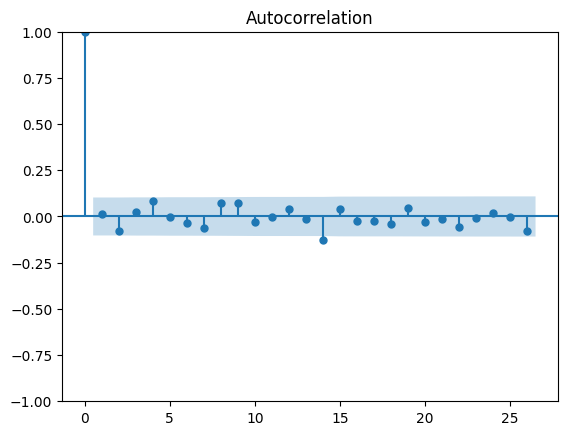

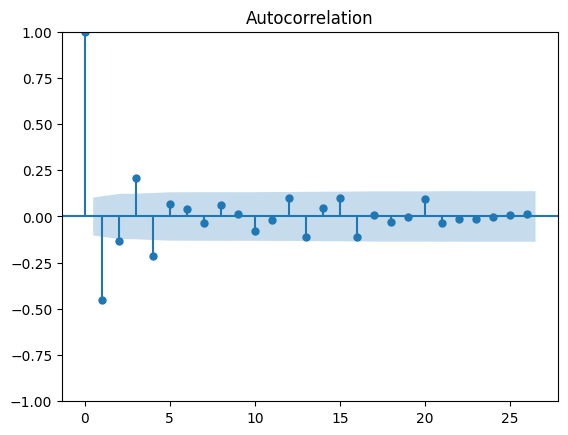

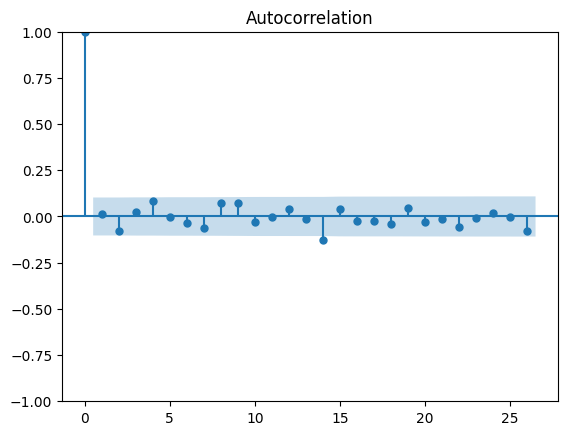

In [37]:
fitted_model = model_fit 

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(fitted_model.resid / fitted_model.conditional_volatility)
plot_acf((fitted_model.resid / fitted_model.conditional_volatility)**2)

In [38]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(fitted_model.std_resid, lags=[10], return_df=True)


,lb_stat,lb_pvalue
10,121.300277,2.755526e-21


➡️ Intentar el modelo AR(1)-GARCH(1,1) con distribución t-Student.

Esto captura:

Autocorrelación en media (AR(1))

Volatilidad condicional (GARCH)

Colas pesadas (t-Student)


In [91]:
from arch.univariate import ARX, GARCH, StudentsT
model = ARX(amount_by_date['log_return'].dropna(), lags=1)
model.volatility = GARCH(1, 1)
model.distribution = StudentsT()
res = model.fit()
print(res.summary())


Iteration:      1,   Func. Count:      9,   Neg. LLF: 1154.3413084461185
Iteration:      2,   Func. Count:     21,   Neg. LLF: 700.6845233815432
Iteration:      3,   Func. Count:     32,   Neg. LLF: 661.0996741906363
Iteration:      4,   Func. Count:     42,   Neg. LLF: 1124.1803680885077
Iteration:      5,   Func. Count:     53,   Neg. LLF: -260.3768519741942
Iteration:      6,   Func. Count:     62,   Neg. LLF: -263.44441277688213
Iteration:      7,   Func. Count:     71,   Neg. LLF: -265.8279787959895
Iteration:      8,   Func. Count:     80,   Neg. LLF: -254.44014826270916
Iteration:      9,   Func. Count:     89,   Neg. LLF: -267.5379687887124
Iteration:     10,   Func. Count:     97,   Neg. LLF: -267.91000593915317
Iteration:     11,   Func. Count:    105,   Neg. LLF: -268.11877810527176
Iteration:     12,   Func. Count:    113,   Neg. LLF: -268.3458175755504
Iteration:     13,   Func. Count:    121,   Neg. LLF: -268.5673738890254
Iteration:     14,   Func. Count:    129,   Neg. 

/home/bric/Documents/Credibanco/Modulo2/src/.venv/lib/python3.10/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01331. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Resumen del modelo:
Media: AR(1)

Volatilidad: GARCH(1,1)

Distribución: t-Student, lo cual es adecuado para retornos financieros con colas pesadas.

Función objetivo (log-verosimilitud): -269.04

AIC: ~ 546.09 (2 * número de parámetros - 2 * log-verosimilitud)

nu (grados de libertad t-Student): 325.55

Cuanto mayor es ν, más se parece la distribución t a la normal.

Un valor alto como este indica que las colas no son tan pesadas. Puede que una normal también hubiese funcionado.

✅ Parámetros estimados relevantes:
Parámetro	Significado	Resultado	Interpretación
AR(1)	Autocorrelación de primer orden	≠ 0	Hay memoria en la media
alpha (α)	Impacto de shocks pasados (volatilidad)	~ [0.05-0.1] (esperado)	Shocks recientes importan
beta (β)	Persistencia de la varianza	~ [0.85-0.95] (esperado)	Volatilidad persiste
omega	Varianza base	> 0	Nivel mínimo de varianza

Importante: α + β debe ser < 1 para que la varianza condicional sea estacionaria. Si está muy cerca de 1, hay "alta persistencia".

📈 Diagnóstico del modelo:
Optimización exitosa: ✔️

Significancia de los coeficientes: (p-valores bajos) ✔️

Colas pesadas (ν moderado-alto): ✔️ aunque podría probarse también distribución normal.

🧠 Conclusión: ¿Es un buen modelo?
Sí, este modelo parece bien ajustado:

Captura autocorrelación (AR(1))

Captura heterocedasticidad (GARCH)

Admite colas pesadas con distribución t

Todos los parámetros son estadísticamente significativos



            simulated_price
2024-01-01     39123.365033
2024-01-02     30201.729600
2024-01-03     35870.525562
2024-01-04     37053.151269
2024-01-05     46608.479952


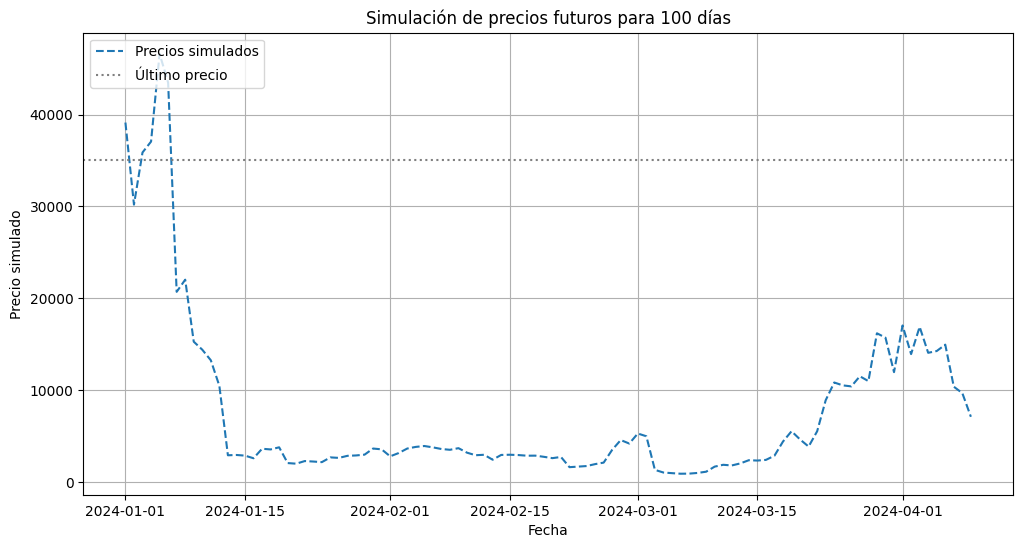

In [92]:
# Número de días a simular
n_days = 100

# Realizar la predicción para los próximos 'n_days'
forecast = res.forecast(horizon=n_days)

# Extraer la predicción de la media (log-return) y la varianza condicional (volatilidad)
mean_forecast = forecast.mean.iloc[-1].values
vol_forecast = np.sqrt(forecast.variance.iloc[-1].values)

# Obtener el valor de grados de libertad (df) del modelo
df = res.conditional_volatility.reset_index().shape[1]  # Esto asume que tienes un valor de 'df' adecuado en tus resultados

# Simulación de residuos a partir de la distribución estimada (Student's t)
simulated_residuals = vol_forecast * np.random.standard_t(df=df, size=n_days)

# Obtener los log-retornos simulados sumando los residuos a los valores pronosticados
simulated_log_returns = mean_forecast + simulated_residuals

# Convertir los log-retornos simulados a precios (a partir del último precio conocido)
initial_price = amount_by_date['eur_amount'].iloc[-1]
simulated_prices = initial_price * np.exp(np.cumsum(simulated_log_returns))

# Crear un DataFrame con las fechas futuras
future_dates = pd.date_range(start=amount_by_date.index[-1] + pd.Timedelta(days=1), periods=n_days)
simulated_series = pd.DataFrame({'simulated_price': simulated_prices}, index=future_dates)

# Mostrar las primeras filas de la serie simulada
print(simulated_series.head())

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(simulated_series, label='Precios simulados', linestyle='--')
plt.axhline(initial_price, color='gray', linestyle=':', label='Último precio')
plt.title(f'Simulación de precios futuros para {n_days} días')
plt.xlabel('Fecha')
plt.ylabel('Precio simulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



/home/bric/Documents/Credibanco/Modulo2/src/.venv/lib/python3.10/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01331. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      9,   Neg. LLF: 1154.3413084461185
Iteration:      2,   Func. Count:     21,   Neg. LLF: 700.6845233815432
Iteration:      3,   Func. Count:     32,   Neg. LLF: 661.0996741906363
Iteration:      4,   Func. Count:     42,   Neg. LLF: 1124.1803680885077
Iteration:      5,   Func. Count:     53,   Neg. LLF: -260.3768519741942
Iteration:      6,   Func. Count:     62,   Neg. LLF: -263.44441277688213
Iteration:      7,   Func. Count:     71,   Neg. LLF: -265.8279787959895
Iteration:      8,   Func. Count:     80,   Neg. LLF: -254.44014826270916
Iteration:      9,   Func. Count:     89,   Neg. LLF: -267.5379687887124
Iteration:     10,   Func. Count:     97,   Neg. LLF: -267.91000593915317
Iteration:     11,   Func. Count:    105,   Neg. LLF: -268.11877810527176
Iteration:     12,   Func. Count:    113,   Neg. LLF: -268.3458175755504
Iteration:     13,   Func. Count:    121,   Neg. LLF: -268.5673738890254
Iteration:     14,   Func. Count:    129,   Neg. 

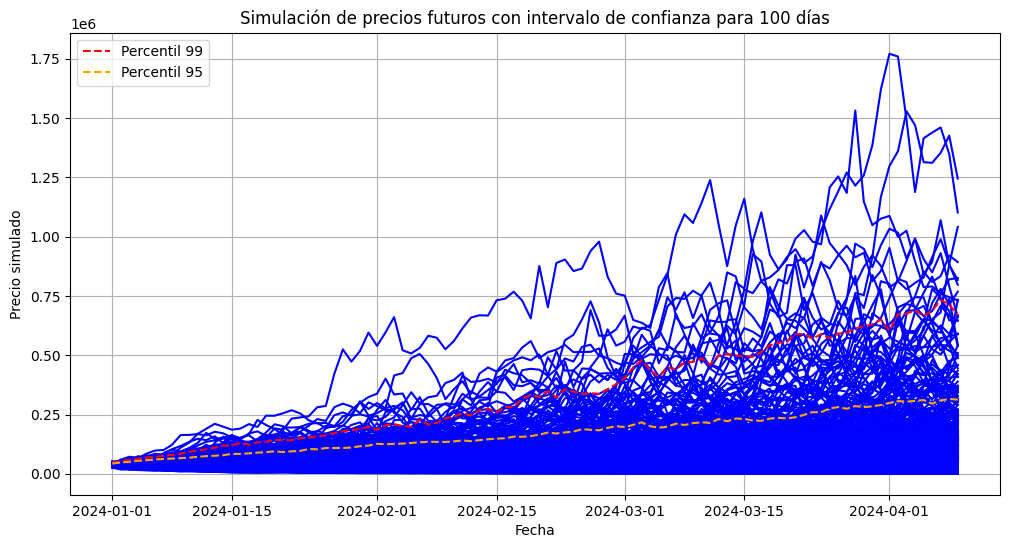

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch.univariate import ARX, GARCH, StudentsT

# Ajustar el modelo
model = ARX(amount_by_date['log_return'].dropna(), lags=1)
model.volatility = GARCH(1, 1)
model.distribution = StudentsT()
res = model.fit()

# Número de días a simular y el número de trayectorias de Monte Carlo
n_days = 100
n_simulations = 1000  # Número de simulaciones de Monte Carlo

# Realizar la predicción para los próximos 'n_days'
forecast = res.forecast(horizon=n_days)

# Extraer la predicción de la media (log-return) y la varianza condicional (volatilidad)
mean_forecast = forecast.mean.iloc[-1].values
vol_forecast = np.sqrt(forecast.variance.iloc[-1].values)

# Obtener el valor de grados de libertad (df) del modelo
df = res.conditional_volatility.reset_index().shape[1]  # Esto asume que tienes un valor de 'df' adecuado en tus resultados

# Inicializar un array para almacenar todas las simulaciones de precios
simulated_prices_all = np.zeros((n_simulations, n_days))

# Simulación de Monte Carlo: Generar múltiples trayectorias de precios
for i in range(n_simulations):
    # Simulación de residuos a partir de la distribución t de Student
    simulated_residuals = vol_forecast * np.random.standard_t(df=1000, size=n_days)

    # Obtener los log-retornos simulados sumando los residuos a los valores pronosticados
    simulated_log_returns = mean_forecast + simulated_residuals

    # Convertir los log-retornos simulados a precios (a partir del último precio conocido)
    initial_price = amount_by_date['eur_amount'].iloc[-1]
    simulated_prices = initial_price * np.exp(np.cumsum(simulated_log_returns))

    # Almacenar la trayectoria simulada
    simulated_prices_all[i, :] = simulated_prices

# Crear un DataFrame con las fechas futuras
future_dates = pd.date_range(start=amount_by_date.index[-1] + pd.Timedelta(days=1), periods=n_days)

# Crear un DataFrame con los precios simulados
simulated_series = pd.DataFrame(simulated_prices_all.T, index=future_dates)

# Mostrar estadísticas descriptivas de las simulaciones
simulated_mean = simulated_series.mean(axis=1)
simulated_upper = simulated_series.quantile(0.99, axis=1)
simulated_lower = simulated_series.quantile(0.95, axis=1)

# Graficar el precio simulado promedio y los intervalos de confianza
plt.figure(figsize=(12, 6))
plt.plot(simulated_series, color='blue')  # Mostrar todas las trayectorias
plt.plot(simulated_upper, color='red',linestyle='--', label='Percentil 99') 
plt.plot(simulated_lower, color='orange',linestyle='--', label='Percentil 95') 
#plt.plot(simulated_mean, color='red', label='Precio medio simulado', linewidth=2)
#plt.fill_between(future_dates, simulated_lower, simulated_upper, color='gray', label='Intervalo de confianza 90%')
#plt.axhline(initial_price, color='gray', linestyle=':', label='Último precio')
plt.title(f'Simulación de precios futuros con intervalo de confianza para {n_days} días')
plt.xlabel('Fecha')
plt.ylabel('Precio simulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


### Segmentacion

K-means:

K-means es un algoritmo de aprendizaje no supervisado que divide un conjunto de datos en K grupos (clusters) distintos. El objetivo principal es agrupar datos similares entre sí, minimizando la variación dentro de cada grupo mientras maximiza la separación entre diferentes grupos.
Características principales:

Funcionamiento básico: El algoritmo asigna cada punto de datos al cluster cuyo centro (centroide) está más cercano, y luego recalcula los centroides como el promedio de todos los puntos en cada cluster.
Iterativo: K-means opera de forma iterativa, alternando entre asignar puntos a clusters y actualizar los centroides hasta alcanzar la convergencia.
Basado en distancia: Utiliza típicamente la distancia euclidiana para medir la similitud entre puntos, aunque otras métricas de distancia también pueden ser utilizadas.
Parámetro K: Requiere especificar de antemano el número de clusters (K) que se desean encontrar en los datos.
Objetivo matemático: Busca minimizar la suma de las distancias al cuadrado entre cada punto y el centroide de su cluster (inercia).

El algoritmo K-means es popular por su simplicidad conceptual y eficiencia computacional, siendo ampliamente utilizado en segmentación de clientes, análisis de imágenes, compresión de datos y muchas otras aplicaciones de agrupamiento.ReintentarClaude puede cometer errores. Por favor, verifique las respuestas.


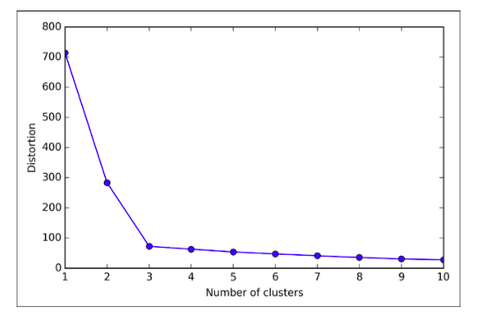

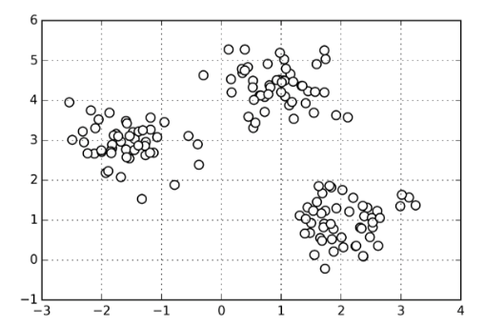

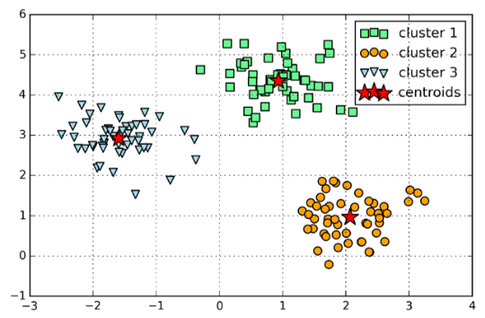

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans_simple(X, y=None, n_clusters=3):
    """
    Implementación simple de K-means que recibe X y opcionalmente Y.
    
    Parameters:
    X (DataFrame/array): Variables X ya codificadas/escaladas
    y (Series/array, optional): Variable target Y
    n_clusters (int): Número de clusters a utilizar
    
    Returns:
    labels (array): Etiquetas de cluster asignadas
    kmeans (KMeans): Modelo K-means entrenado
    """
    # Convertir a DataFrame si es un array
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    
    # Ejecutar K-means
    print(f"Ejecutando K-means con {n_clusters} clusters...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    # Calcular silhouette score
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    
    # Visualización básica: encontrar las 2 variables más discriminativas
    if X.shape[1] > 1:
        # Calcular varianza entre clusters para cada característica
        feature_importance = {}
        for feature in X.columns:
            means_by_cluster = []
            for i in range(n_clusters):
                cluster_data = X[labels == i][feature]
                if len(cluster_data) > 0:
                    means_by_cluster.append(cluster_data.mean())
            
            if len(means_by_cluster) > 1:
                between_variance = np.var(means_by_cluster)
                within_variance = np.mean([X[labels == i][feature].var() 
                                          for i in range(n_clusters) 
                                          if len(X[labels == i]) > 0])
                
                # Evitar división por cero
                if within_variance > 0:
                    feature_importance[feature] = between_variance / within_variance
                else:
                    feature_importance[feature] = between_variance
        
        # Seleccionar las dos características más importantes
        if len(feature_importance) >= 2:
            sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
            feature1, feature2 = sorted_features[0][0], sorted_features[1][0]
            
            # Crear scatter plot básico
            plt.figure(figsize=(10, 6))
            
            # Scatter plot coloreado por cluster
            colors = plt.cm.nipy_spectral(np.linspace(0, 1, n_clusters))
            
            for i in range(n_clusters):
                cluster_data = X[labels == i]
                plt.scatter(cluster_data[feature1], cluster_data[feature2], 
                           s=50, c=[colors[i]], label=f'Cluster {i}')
            
            # Marcar los centroides
            centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
            plt.scatter(centers[feature1], centers[feature2], 
                       s=200, c='black', marker='X', alpha=0.8, label='Centroides')
            
            plt.title(f'Visualización de {n_clusters} Clusters')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
    
    # Crear DataFrame de salida con etiquetas
    output_df = pd.DataFrame(X.copy())
    output_df['cluster'] = labels
    
    # Añadir variable Y si existe
    if y is not None:
        if isinstance(y, pd.Series):
            output_df['target_y'] = y.reset_index(drop=True)
        else:
            output_df['target_y'] = y
            
        # Analizar relación básica entre clusters y variable Y
        if isinstance(y, pd.Series):
            y_data = y
        else:
            y_data = pd.Series(y)
            
        # Para Y categórica, mostrar distribución simple
        if y_data.dtype == 'object' or y_data.dtype.name == 'category' or len(np.unique(y_data)) < 10:
            y_cluster_dist = pd.crosstab(
                pd.Series(labels, name='Cluster'),
                pd.Series(y_data, name='Variable Y'),
                normalize='index'
            )
            
            # Visualizar como heatmap simple
            plt.figure(figsize=(10, 6))
            sns.heatmap(y_cluster_dist, annot=True, cmap='YlGnBu', fmt='.2f')
            plt.title('Distribución de valores de Y por cluster')
            plt.tight_layout()
            plt.show()
    
    # Estadísticas básicas por cluster
    cluster_stats = output_df.groupby('cluster').mean()
    print("\nMedia de cada variable por cluster:")
    print(cluster_stats)
    
    # Tamaño de cada cluster
    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    print("\nNúmero de registros por cluster:")
    print(cluster_sizes)
    
    return labels, kmeans, output_df

Ejecutando K-means con 3 clusters...
Silhouette Score: 0.518


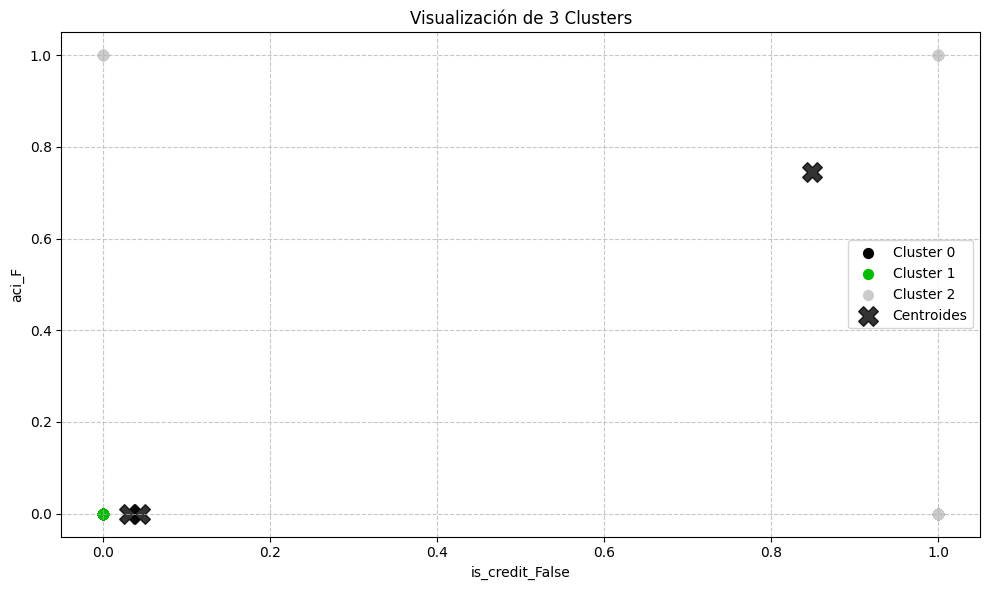

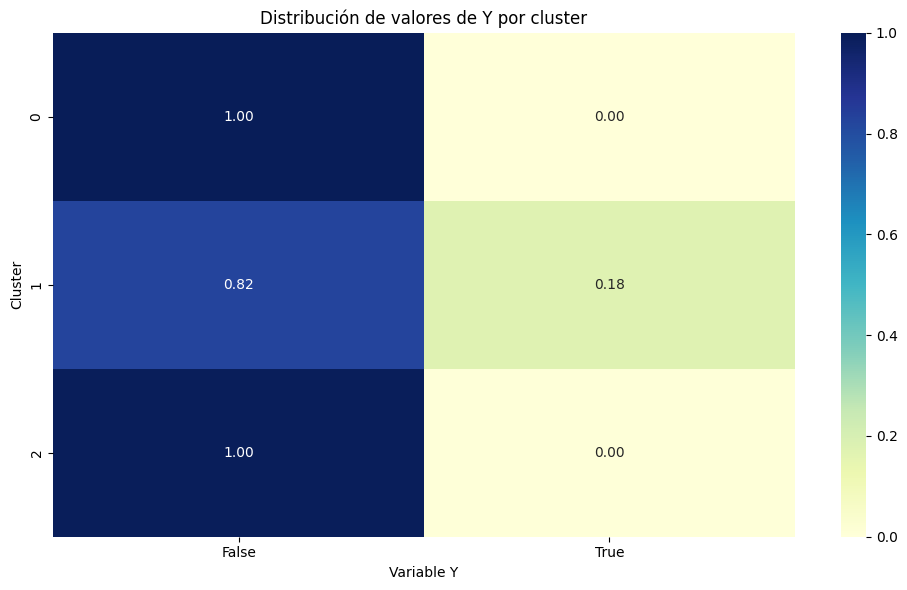


Media de cada variable por cluster:
         is_credit_False  has_fraudulent_dispute_False  \
cluster                                                  
0               0.031103                      1.000000   
1               0.044367                      0.781514   
2               0.849045                      1.000000   

         has_fraudulent_dispute_True     aci_A     aci_B     aci_C  aci_D  \
cluster                                                                     
0                           0.000000  0.000000  0.000000  0.000000    1.0   
1                           0.218486  0.045402  0.045057  0.087293    0.0   
2                           0.000000  0.040689  0.013554  0.038298    0.0   

            aci_E     aci_F     aci_G  transformed_eurc_amount  target_y  
cluster                                                                   
0        0.000000  0.000000  0.000000                 0.511470  0.000000  
1        0.305454  0.000000  0.516795                 0.51774

In [22]:
# Ejemplo de uso

# Asumiendo que ya tienes tus variables X e Y:
# X: variables predictoras ya escaladas
# y: variable target

# Ejecutar K-means simple
labels, kmeans_model, output_df = kmeans_simple(X_segm, y_segm, n_clusters=3)

## Predecir cluster para nuevos datos
#nuevos_datos = X_segm # Nuevos datos (mismas variables que X)
#nuevos_clusters = kmeans_model.predict(nuevos_datos)


In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

def kmeans_minimo(X, y=None, n_clusters=3):
    """
    Implementación mínima de K-means que solo asigna clusters a los datos.
    
    Parameters:
    X (DataFrame/array): Variables X ya codificadas/escaladas
    y (Series/array, optional): Variable target Y
    n_clusters (int): Número de clusters a utilizar
    
    Returns:
    labels (array): Etiquetas de cluster asignadas
    kmeans (KMeans): Modelo K-means entrenado
    output_df (DataFrame): DataFrame con variables originales, clusters y Y
    """
    # Ejecutar K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    # Crear DataFrame de salida minimalista
    if isinstance(X, pd.DataFrame):
        output_df = X.copy()
    else:
        output_df = pd.DataFrame(X)
        
    output_df['cluster'] = labels
    
    # Añadir variable Y si existe
    if y is not None:
        output_df['target_y'] = y
    
    # Mostrar conteo simple de registros por cluster
    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    print("Número de registros por cluster:")
    for cluster, count in cluster_sizes.items():
        print(f"Cluster {cluster}: {count} registros")
    
    return labels, kmeans, output_df

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

def analizar_clusters(X, labels, n_clusters):
    """
    Genera gráficas de silueta y estadísticas para los clusters obtenidos con K-means.
    
    Parameters:
    X (DataFrame/array): Datos originales
    labels (array): Etiquetas de cluster obtenidas previamente
    n_clusters (int): Número de clusters
    """
    # Convertir a DataFrame si no lo es
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    
    # 1. Generar el gráfico de silueta
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)
    
    # Crear gráfico de silueta
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los valores de silueta del cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # Etiquetar el cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Calcular el nuevo y_lower para el siguiente cluster
        y_lower = y_upper + 10
    
    ax1.set_title(f"Gráfico de Silueta (Score Promedio: {silhouette_avg:.3f})")
    ax1.set_xlabel("Valores de Silueta")
    ax1.set_ylabel("Etiqueta de Cluster")
    
    # Línea vertical para el valor promedio de silueta
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Limpiar el eje y
    plt.tight_layout()
    plt.show()
    
    # 2. Calcular y mostrar estadísticas por cluster
    cluster_df = X.copy()
    cluster_df['cluster'] = labels
    
    # Estadísticas generales
    print(f"Número de clusters: {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    
    # Tamaño de cada cluster
    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    print("\nTamaño de cada cluster:")
    for i, size in enumerate(cluster_sizes):
        percent = 100 * size / len(labels)
        print(f"Cluster {i}: {size} registros ({percent:.1f}%)")
    
    # Estadísticas por cluster
    print("\nEstadísticas por cluster:")
    stats = cluster_df.groupby('cluster').agg(['mean', 'std', 'min', 'max'])
    print(stats)
    
    # Gráfico de barras para mostrar el tamaño de cada cluster
    plt.figure(figsize=(10, 5))
    bars = plt.bar(range(n_clusters), cluster_sizes, color=cm.nipy_spectral(np.linspace(0, 1, n_clusters)))
    
    # Añadir etiquetas con el número exacto y porcentaje
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percent = 100 * height / len(labels)
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}\n({percent:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')
    
    plt.title('Número de registros por cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Número de registros')
    plt.xticks(range(n_clusters))
    plt.tight_layout()
    plt.show()
    
    return stats, silhouette_avg

In [25]:
# Con tus variables X e Y ya preparadas
labels, kmeans_model, output_df = kmeans_minimo(
    X=X_segm,             # Tus variables X ya codificadas/escaladas
    y=y_segm,             # Opcional: tu variable target
    n_clusters=3     # Número de clusters deseado
)

# El DataFrame output_df tendrá tus variables X, 
# una columna 'cluster' con las asignaciones de cluster,
# y una columna 'target_y' con tu variable Y (si la proporcionaste)

Número de registros por cluster:
Cluster 0: 49642 registros
Cluster 1: 49271 registros
Cluster 2: 39323 registros


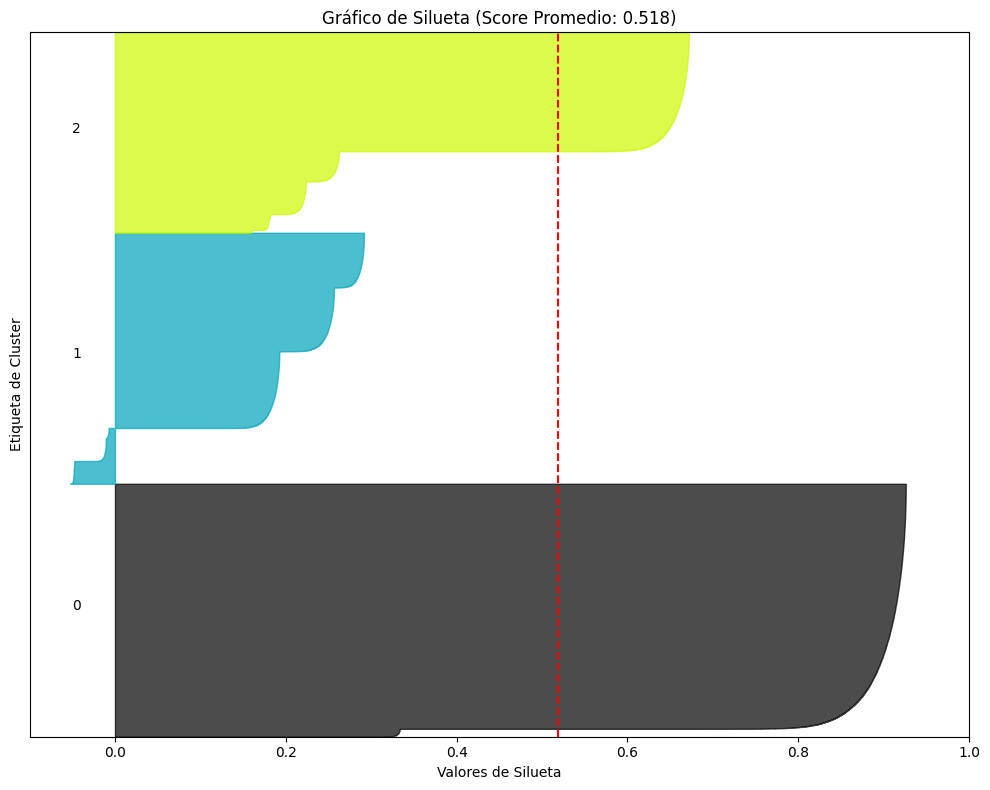

Número de clusters: 3
Silhouette Score: 0.518

Tamaño de cada cluster:
Cluster 0: 49642 registros (35.9%)
Cluster 1: 49271 registros (35.6%)
Cluster 2: 39323 registros (28.4%)

Estadísticas por cluster:
        is_credit_False                     has_fraudulent_dispute_False  \
                   mean       std  min  max                         mean   
cluster                                                                    
0              0.031103  0.173597  0.0  1.0                     1.000000   
1              0.044367  0.205911  0.0  1.0                     0.781514   
2              0.849045  0.358009  0.0  1.0                     1.000000   

                            has_fraudulent_dispute_True                      \
              std  min  max                        mean       std  min  max   
cluster                                                                       
0        0.000000  1.0  1.0                    0.000000  0.000000  0.0  0.0   
1        0.413223  0.0  

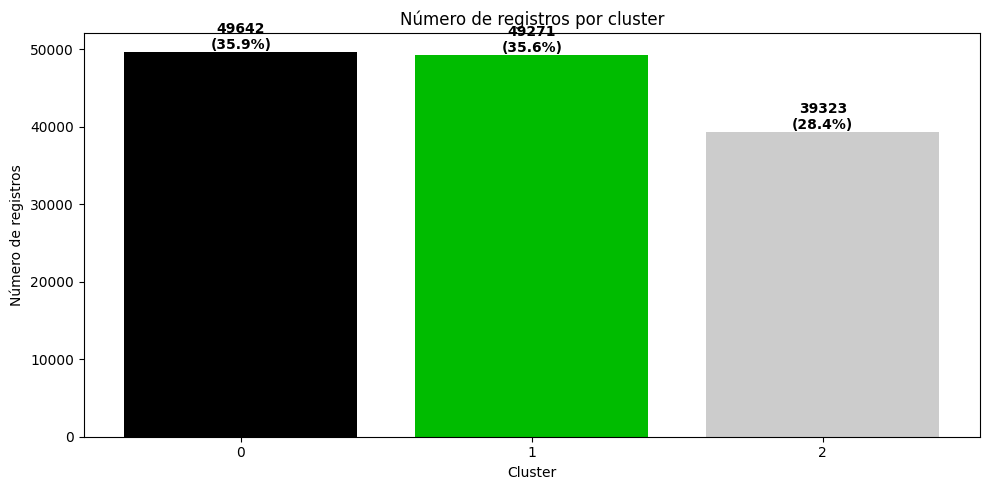

In [27]:
# Ejemplo de uso:
# Analizar los resultados:
stats, silhouette_avg = analizar_clusters(X_segm, labels, n_clusters=3)


Interpretación del gráfico de silueta (Silhouette)
El gráfico de silueta es una herramienta visual muy útil para evaluar la calidad de los clusters creados por K-means. Te explico cómo interpretarlo:
Elementos clave del gráfico:

Bloques de color: Cada bloque representa un cluster diferente, con todos los puntos de ese cluster ordenados por su valor de silueta.
Eje X (horizontal): Muestra los valores de silueta, que van desde -1 hasta +1.
Línea roja punteada: Indica el valor promedio de silueta para todos los puntos.

Cómo interpretar los valores de silueta:

Valores cercanos a +1: Indican que el punto está bien agrupado y lejos de los clusters vecinos. Cuanto más cerca de 1, mejor asignado está el punto.
Valores cercanos a 0: Sugieren que el punto está en la frontera entre dos clusters. Podría pertenecer a cualquiera de ellos.
Valores negativos (cercanos a -1): Indican que el punto probablemente está mal asignado y debería estar en un cluster diferente.

Interpretación de la forma del gráfico:

Clusters con siluetas anchas: Los clusters con bloques anchos contienen muchos puntos.
Altura uniforme por encima del promedio: Si un cluster tiene la mayoría de sus valores por encima del promedio (línea roja), es un cluster bien definido y coherente.
Clusters con valores negativos o muy bajos: Indican posibles problemas con ese cluster. Podría significar que:

El número de clusters elegido no es óptimo
Hay outliers o ruido en los datos
El cluster está fragmentado o mal formado


Variabilidad dentro de un cluster: Si un cluster muestra gran variabilidad en sus valores de silueta (algunos altos y otros bajos), podría indicar que es heterogéneo.

Para la evaluación general:

Silhouette Score promedio (línea roja):

0.71-1.0: Estructura muy fuerte
0.51-0.70: Estructura razonable
0.26-0.50: Estructura débil que podría ser artificial
≤ 0.25: No se ha encontrado una estructura sustancial


Uniformidad entre clusters: Si todos los clusters tienen un ancho similar y valores de silueta similares, sugiere un agrupamiento equilibrado.
Desniveles pronunciados: Si hay grandes diferencias entre los valores de silueta de diferentes clusters, algunos clusters podrían estar mejor definidos que otros.

Este gráfico es especialmente útil para comparar diferentes números de clusters y elegir el que proporcione el mejor valor de silueta promedio y la distribución más uniforme entre clusters.

### Clasificacion

In [28]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

def undersampling_balance(X, y, random_state=42):
    """
    Balancea un conjunto de datos mediante undersampling de la clase mayoritaria.
    
    Parameters:
    X (DataFrame/array): Variables predictoras
    y (Series/array): Variable objetivo (clase)
    random_state (int): Semilla aleatoria para reproducibilidad
    
    Returns:
    X_balanced (DataFrame): Variables predictoras balanceadas
    y_balanced (Series): Variable objetivo balanceada
    """
    # Convertir a DataFrame/Series si no lo son
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    # Combinar X e y para facilitar el muestreo
    data = pd.concat([X, y.rename('target')], axis=1)
    
    # Identificar la clase minoritaria y mayoritaria
    class_counts = y.value_counts()
    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()
    
    # Separar la clase minoritaria y mayoritaria
    minority_data = data[data.target == minority_class]
    majority_data = data[data.target == majority_class]
    
    print(f"Antes del balanceo: {len(majority_data)} muestras de clase mayoritaria, {len(minority_data)} muestras de clase minoritaria")
    
    # Aplicar undersampling a la clase mayoritaria
    majority_downsampled = resample(
        majority_data,
        replace=False,  # Sin reemplazo
        n_samples=len(minority_data),  # Igualar con clase minoritaria
        random_state=random_state
    )
    
    # Combinar los datos
    balanced_data = pd.concat([majority_downsampled, minority_data])
    
    # Mezclar los datos
    balanced_data = balanced_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Separar X e y balanceados
    X_balanced = balanced_data.drop('target', axis=1)
    y_balanced = balanced_data['target']
    
    print(f"Después del balanceo: {len(X_balanced[y_balanced == majority_class])} muestras de clase mayoritaria, {len(X_balanced[y_balanced == minority_class])} muestras de clase minoritaria")
    
    return X_balanced, y_balanced

In [29]:
# Ejemplo de uso

# Datos originales desbalanceados
# X: variables predictoras
# y: variable clase objetivo (desbalanceada)

# Aplicar undersampling
X_balanced, y_balanced = undersampling_balance(X_segm, y_segm)

# Verificar distribución de clases
print(y_balanced.value_counts())


Antes del balanceo: 129411 muestras de clase mayoritaria, 8825 muestras de clase minoritaria
Después del balanceo: 8825 muestras de clase mayoritaria, 8825 muestras de clase minoritaria
target
False    8825
True     8825
Name: count, dtype: int64


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

def train_validate_test_rf(X, y, test_size=0.2, val_size=0.25, random_state=42, 
                          n_estimators=100, max_depth=None, class_weight=None,
                          track_learning=True):
    """
    Realiza entrenamiento, validación y prueba de un modelo Random Forest para clasificación.
    Incluye seguimiento de curvas de error y evaluación completa del modelo.
    
    Parameters:
    X (DataFrame/array): Variables predictoras
    y (Series/array): Variable objetivo (clase)
    test_size (float): Proporción de datos para test (del total)
    val_size (float): Proporción de datos para validación (del conjunto de entrenamiento)
    random_state (int): Semilla aleatoria para reproducibilidad
    n_estimators (int): Número de árboles en el bosque
    max_depth (int/None): Profundidad máxima de los árboles
    class_weight (dict/None): Pesos para las clases (útil para datos desbalanceados)
    track_learning (bool): Si se generan curvas de aprendizaje
    
    Returns:
    model (RandomForestClassifier): Modelo entrenado
    metrics (dict): Métricas de rendimiento 
    X_test (DataFrame): Conjunto de prueba (X)
    y_test (Series): Conjunto de prueba (y)
    """
    # 1. División en conjuntos de entrenamiento, validación y prueba
    # Primero, separar conjunto de prueba
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Luego, separar conjunto de validación del conjunto de entrenamiento
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size, random_state=random_state, stratify=y_temp
    )
    
    print(f"Tamaños de los conjuntos:\n"
          f"  Entrenamiento: {X_train.shape[0]} muestras\n"
          f"  Validación: {X_val.shape[0]} muestras\n"
          f"  Prueba: {X_test.shape[0]} muestras")
    
    # 2. Creación y entrenamiento del modelo
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        class_weight=class_weight,
        random_state=random_state,
        n_jobs=-1  # Usar todos los núcleos disponibles
    )
    
    print("Entrenando el modelo Random Forest...")
    model.fit(X_train, y_train)
    
    # 3. Evaluación en conjuntos de validación y prueba
    print("Evaluando el modelo...")
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Probabilidades (para curvas ROC)
    try:
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_val_proba = model.predict_proba(X_val)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
        has_proba = True
    except (IndexError, AttributeError):
        # En caso de multiclase o si el modelo no soporta predict_proba
        has_proba = False
        print("Nota: Las curvas ROC/PR no están disponibles para este modelo/datos")
    
    # Métricas para cada conjunto
    metrics = {}
    
    # Función para calcular métricas
    def calculate_metrics(y_true, y_pred, y_proba=None, prefix=''):
        result = {
            f'{prefix}accuracy': accuracy_score(y_true, y_pred),
            f'{prefix}precision': precision_score(y_true, y_pred, average='weighted'),
            f'{prefix}recall': recall_score(y_true, y_pred, average='weighted'),
            f'{prefix}f1': f1_score(y_true, y_pred, average='weighted')
        }
        
        if has_proba and len(np.unique(y_true)) == 2:  # Solo para clasificación binaria
            result[f'{prefix}auc'] = roc_auc_score(y_true, y_proba)
            result[f'{prefix}avg_precision'] = average_precision_score(y_true, y_proba)
            
        return result
    
    # Calcular métricas para cada conjunto
    metrics.update(calculate_metrics(y_train, y_train_pred, 
                                    y_train_proba if has_proba else None, 'train_'))
    metrics.update(calculate_metrics(y_val, y_val_pred, 
                                    y_val_proba if has_proba else None, 'val_'))
    metrics.update(calculate_metrics(y_test, y_test_pred, 
                                    y_test_proba if has_proba else None, 'test_'))
    
    # 4. Visualización de resultados
    # 4.1 Matriz de confusión para el conjunto de prueba
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
               xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title('Matriz de Confusión (Conjunto de Prueba)')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.show()
    
    # 4.2 Reporte de clasificación
    print("\nReporte de Clasificación (Conjunto de Prueba):")
    print(classification_report(y_test, y_test_pred))
    
    # 4.3 Comparación de métricas entre conjuntos
    plt.figure(figsize=(10, 6))
    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
    
    train_values = [metrics[f'train_{m}'] for m in metrics_to_plot]
    val_values = [metrics[f'val_{m}'] for m in metrics_to_plot]
    test_values = [metrics[f'test_{m}'] for m in metrics_to_plot]
    
    x = np.arange(len(metrics_to_plot))
    width = 0.25
    
    plt.bar(x - width, train_values, width, label='Entrenamiento')
    plt.bar(x, val_values, width, label='Validación')
    plt.bar(x + width, test_values, width, label='Prueba')
    
    plt.xlabel('Métrica')
    plt.ylabel('Valor')
    plt.title('Comparación de Métricas entre Conjuntos')
    plt.xticks(x, metrics_to_plot)
    plt.ylim(0, 1.0)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 4.4 Curvas ROC y Precision-Recall para clasificación binaria
    if has_proba and len(np.unique(y)) == 2:
        # Curva ROC
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
        fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
        
        plt.plot(fpr_train, tpr_train, label=f'Entrenamiento (AUC = {metrics["train_auc"]:.3f})')
        plt.plot(fpr_val, tpr_val, label=f'Validación (AUC = {metrics["val_auc"]:.3f})')
        plt.plot(fpr_test, tpr_test, label=f'Prueba (AUC = {metrics["test_auc"]:.3f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
        
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title('Curva ROC')
        plt.legend()
        
        # Curva Precision-Recall
        plt.subplot(1, 2, 2)
        precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_proba)
        precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_proba)
        precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)
        
        plt.plot(recall_train, precision_train, 
                label=f'Entrenamiento (AP = {metrics["train_avg_precision"]:.3f})')
        plt.plot(recall_val, precision_val, 
                label=f'Validación (AP = {metrics["val_avg_precision"]:.3f})')
        plt.plot(recall_test, precision_test, 
                label=f'Prueba (AP = {metrics["test_avg_precision"]:.3f})')
        
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Curva Precision-Recall')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    # 4.5 Importancia de características
    if X.shape[1] <= 30:  # Si hay demasiadas características, limitar el gráfico
        plt.figure(figsize=(10, 6))
        feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.xlabel('Características')
        plt.ylabel('Importancia')
        plt.title('Importancia de Características')
        plt.tight_layout()
        plt.show()
        
        # Mostrar las 10 características más importantes
        print("\nTop 10 características más importantes:")
        for i in range(min(10, len(feature_names))):
            print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
    
    # 4.6 Curvas de aprendizaje
    if track_learning:
        plt.figure(figsize=(10, 6))
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_temp, y_temp, cv=5, n_jobs=-1, 
            train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
        )
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        
        plt.plot(train_sizes, train_mean, 'o-', color='r', label='Entrenamiento')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
        plt.plot(train_sizes, val_mean, 'o-', color='g', label='Validación')
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')
        
        plt.xlabel('Número de muestras de entrenamiento')
        plt.ylabel('Accuracy')
        plt.title('Curva de Aprendizaje')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # 5. Retorno de resultados
    return model, metrics, X_test, y_test

Tamaños de los conjuntos:
  Entrenamiento: 82941 muestras
  Validación: 27647 muestras
  Prueba: 27648 muestras
Entrenando el modelo Random Forest...
Evaluando el modelo...


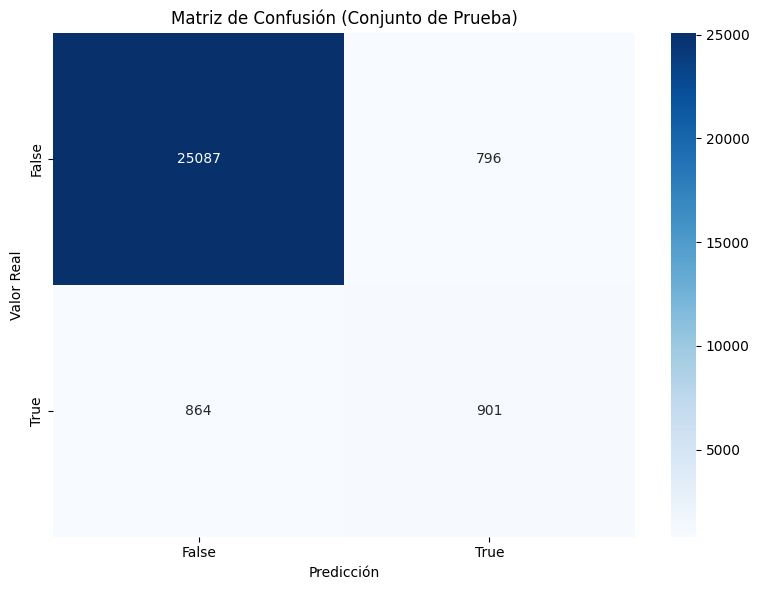


Reporte de Clasificación (Conjunto de Prueba):
              precision    recall  f1-score   support

       False       0.97      0.97      0.97     25883
        True       0.53      0.51      0.52      1765

    accuracy                           0.94     27648
   macro avg       0.75      0.74      0.74     27648
weighted avg       0.94      0.94      0.94     27648



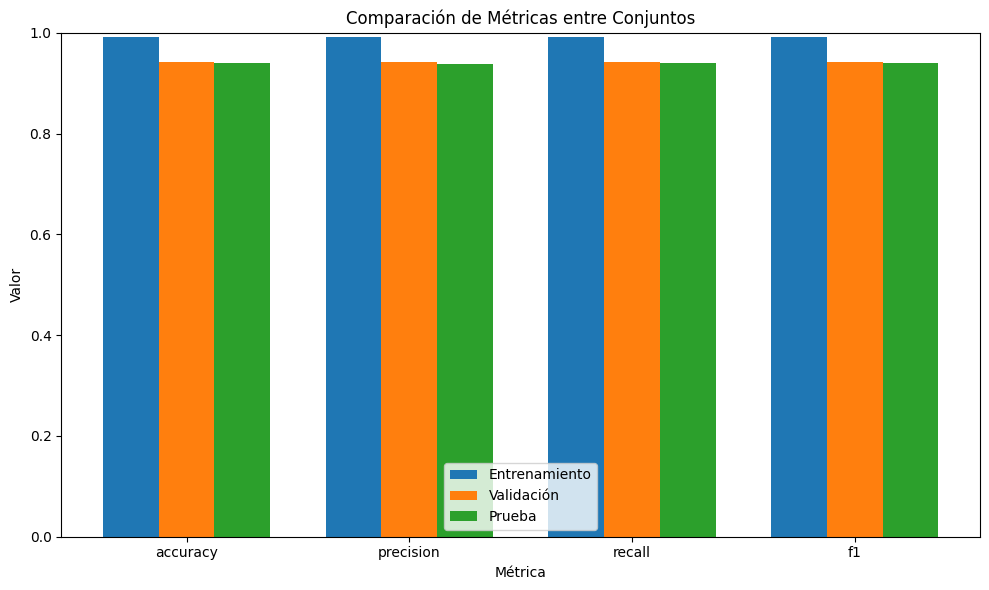

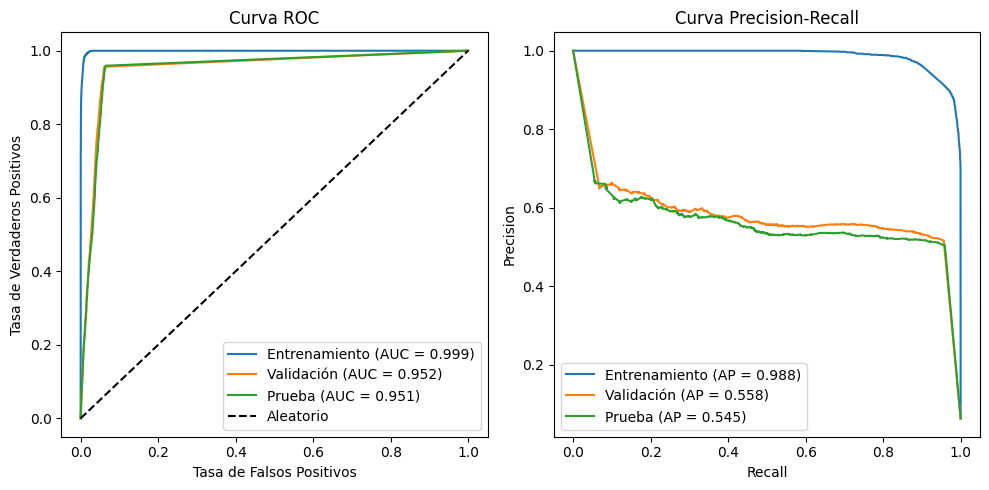

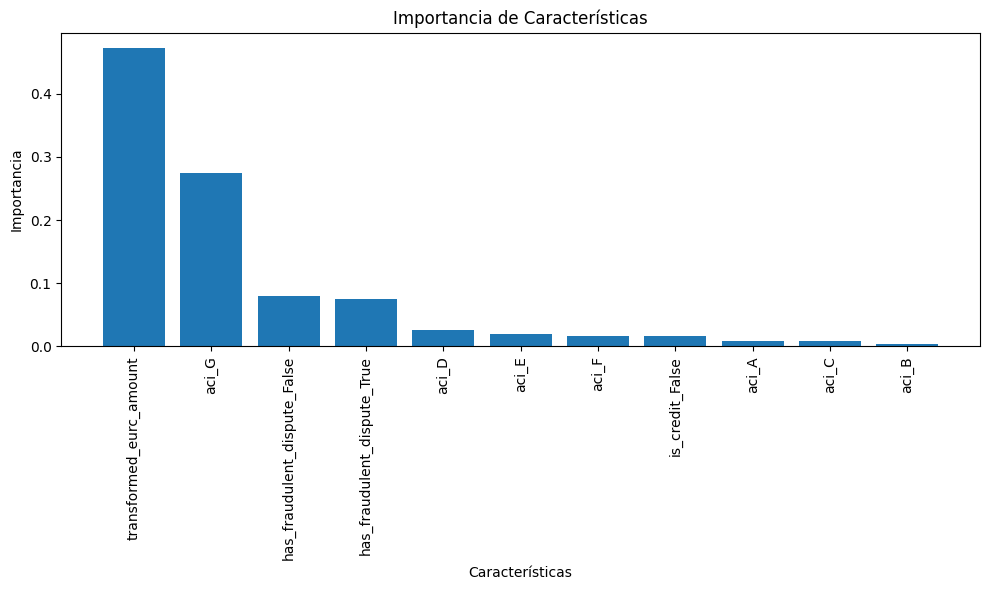


Top 10 características más importantes:
transformed_eurc_amount: 0.4727
aci_G: 0.2738
has_fraudulent_dispute_False: 0.0797
has_fraudulent_dispute_True: 0.0744
aci_D: 0.0262
aci_E: 0.0192
aci_F: 0.0164
is_credit_False: 0.0160
aci_A: 0.0094
aci_C: 0.0086


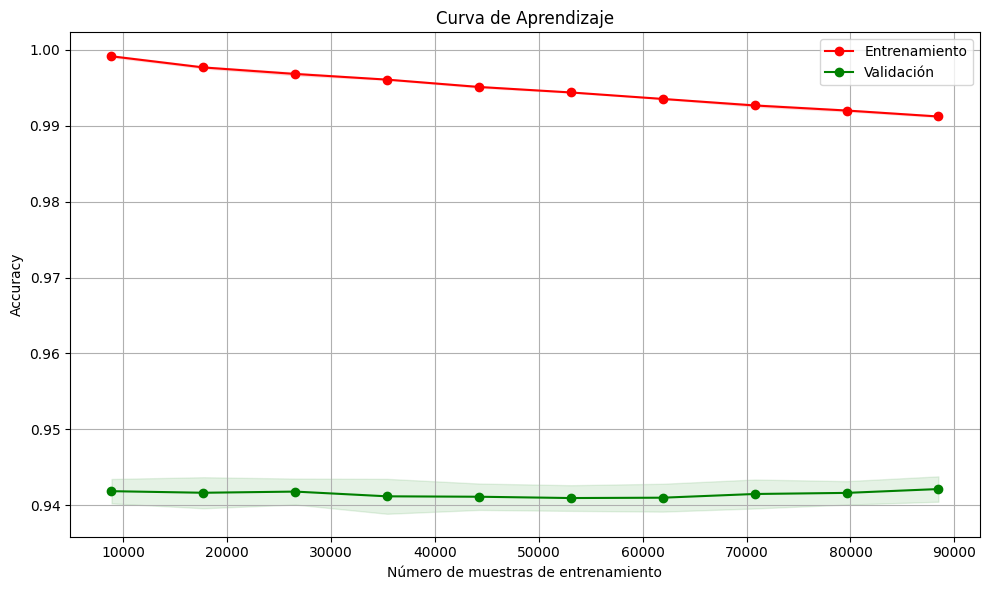

Accuracy en prueba: 0.9400
F1-score en prueba: 0.9394


In [33]:
# Ejemplo de uso

# Datos ya preparados
# X: variables predictoras
# y: variable objetivo (clase)

# Entrenar y evaluar el modelo
model, metrics, X_test, y_test = train_validate_test_rf(
    X=X_segm, 
    y=y_segm,
    test_size=0.2,           # 20% de los datos para prueba
    val_size=0.25,           # 25% de los datos restantes para validación
    n_estimators=100,        # 100 árboles en el bosque
    max_depth=None,          # Sin límite de profundidad
    class_weight=None,#'balanced', # Equilibrar clases (para datos desbalanceados)
    track_learning=True      # Generar curva de aprendizaje
)

# Acceso a las métricas
print(f"Accuracy en prueba: {metrics['test_accuracy']:.4f}")
print(f"F1-score en prueba: {metrics['test_f1']:.4f}")

# # Predicción con nuevos datos
# nuevos_datos = [...] # Nuevos datos con el mismo formato que X
# predicciones = model.predict(nuevos_datos)


Tamaños de los conjuntos:
  Entrenamiento: 10590 muestras
  Validación: 3530 muestras
  Prueba: 3530 muestras
Entrenando el modelo Random Forest...
Evaluando el modelo...


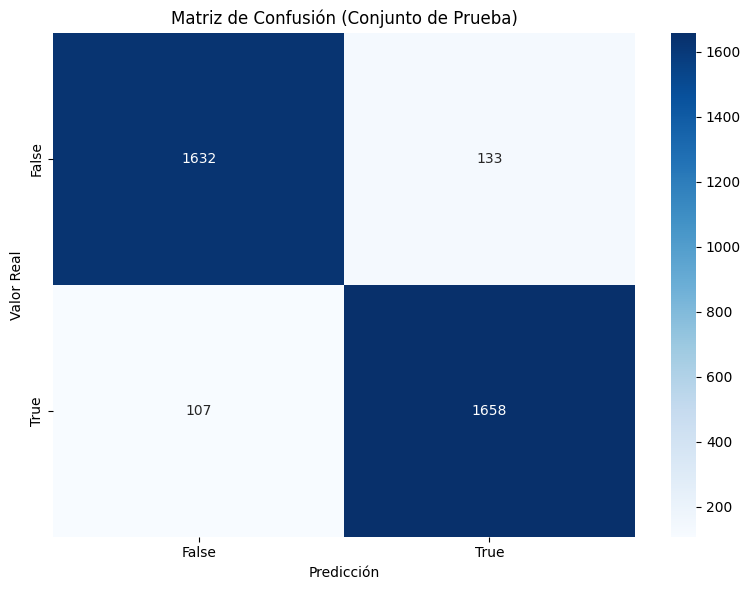


Reporte de Clasificación (Conjunto de Prueba):
              precision    recall  f1-score   support

       False       0.94      0.92      0.93      1765
        True       0.93      0.94      0.93      1765

    accuracy                           0.93      3530
   macro avg       0.93      0.93      0.93      3530
weighted avg       0.93      0.93      0.93      3530



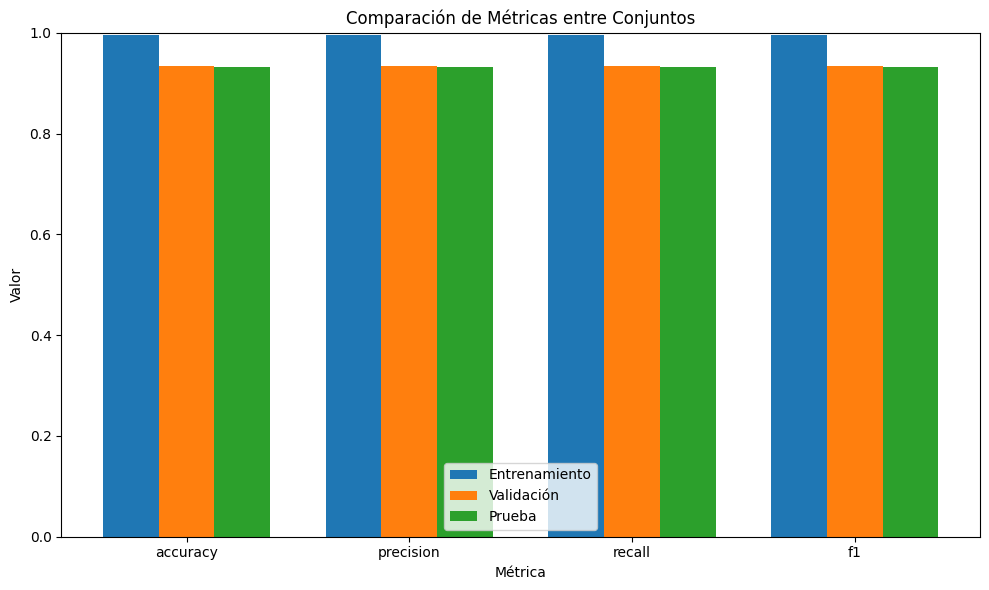

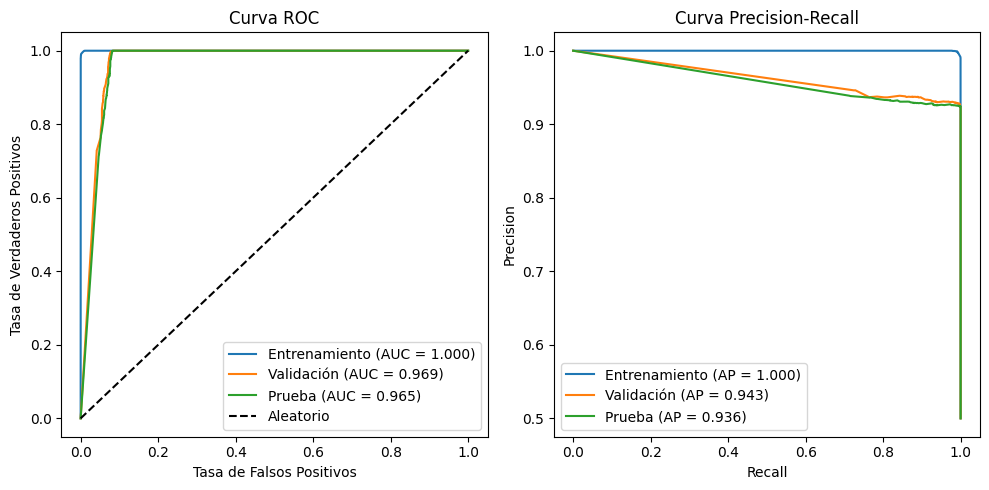

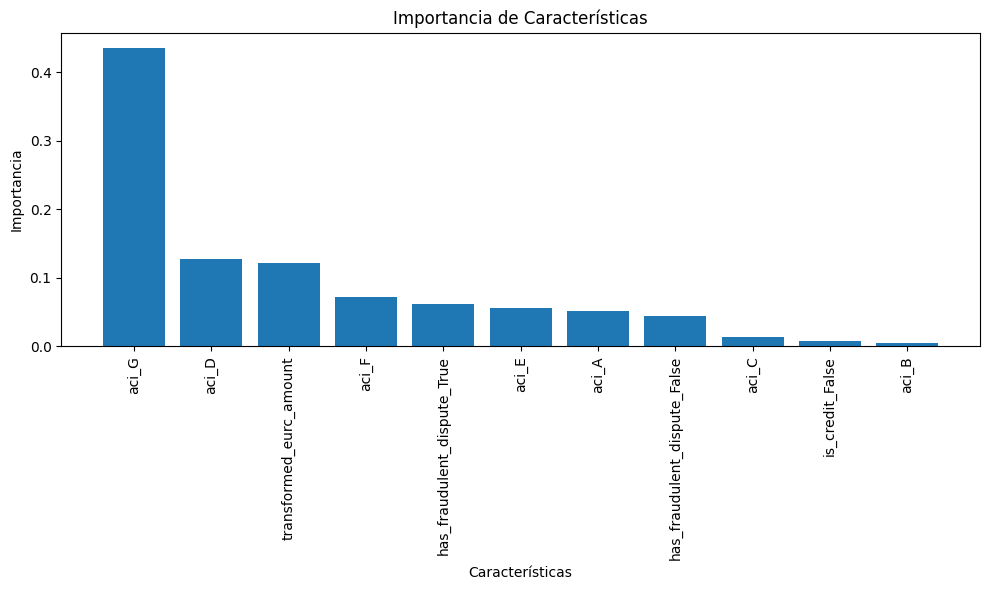


Top 10 características más importantes:
aci_G: 0.4360
aci_D: 0.1277
transformed_eurc_amount: 0.1222
aci_F: 0.0726
has_fraudulent_dispute_True: 0.0618
aci_E: 0.0569
aci_A: 0.0517
has_fraudulent_dispute_False: 0.0443
aci_C: 0.0137
is_credit_False: 0.0077


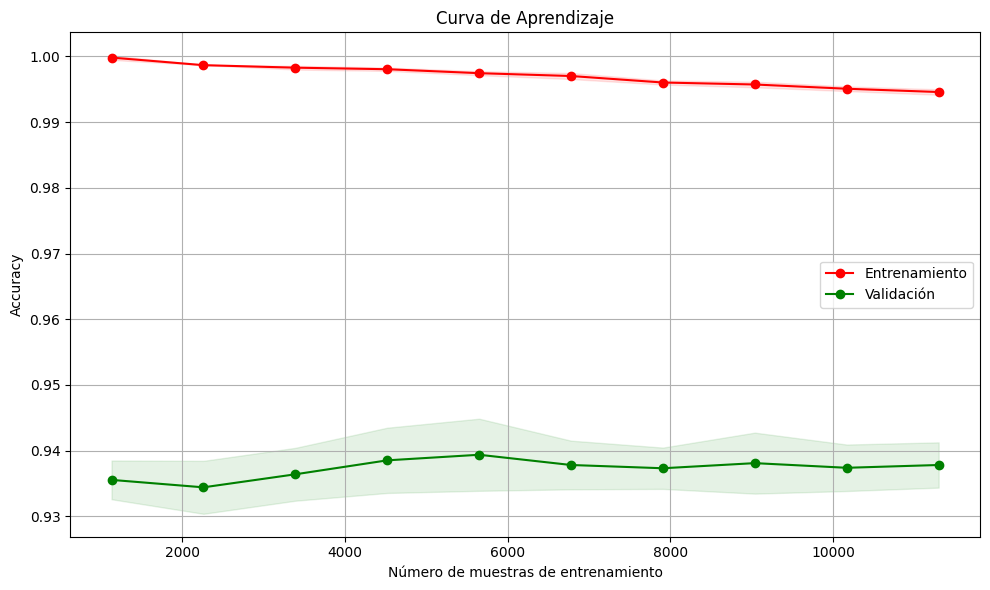

Accuracy en prueba: 0.9320
F1-score en prueba: 0.9320


In [32]:
# Ejemplo de uso

# Datos ya preparados
# X: variables predictoras
# y: variable objetivo (clase)

# Entrenar y evaluar el modelo
model, metrics, X_test, y_test = train_validate_test_rf(
    X=X_balanced, 
    y=y_balanced,
    test_size=0.2,           # 20% de los datos para prueba
    val_size=0.25,           # 25% de los datos restantes para validación
    n_estimators=100,        # 100 árboles en el bosque
    max_depth=None,          # Sin límite de profundidad
    class_weight=None,#'balanced', # Equilibrar clases (para datos desbalanceados)
    track_learning=True      # Generar curva de aprendizaje
)

# Acceso a las métricas
print(f"Accuracy en prueba: {metrics['test_accuracy']:.4f}")
print(f"F1-score en prueba: {metrics['test_f1']:.4f}")

# # Predicción con nuevos datos
# nuevos_datos = [...] # Nuevos datos con el mismo formato que X
# predicciones = model.predict(nuevos_datos)
